# Исследовательский анализ данных рынка недвижимости

**Описание проекта**

Цель - выявить особенности рынка недвижимости и определить как конкретные показатели влияют на рынок. 

Задача-выполнить обработку данных сервиса Яндекс Недвижимость, на основе этих данных провести исследовательский анализ и выявить особенности и зависимости существующие на рынке недвижимости 

**Описание данных**

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price`— цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

------------

## Откройте файл с данными и изучите общую информацию

### Загрузка данных

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv('real_estate_data.csv',sep='\t')

Выключаем научную нотацию

In [3]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

### Получение общей информации

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,NaN,False,False,25,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,19,1,NaN,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121


### Построение общей гистограммы

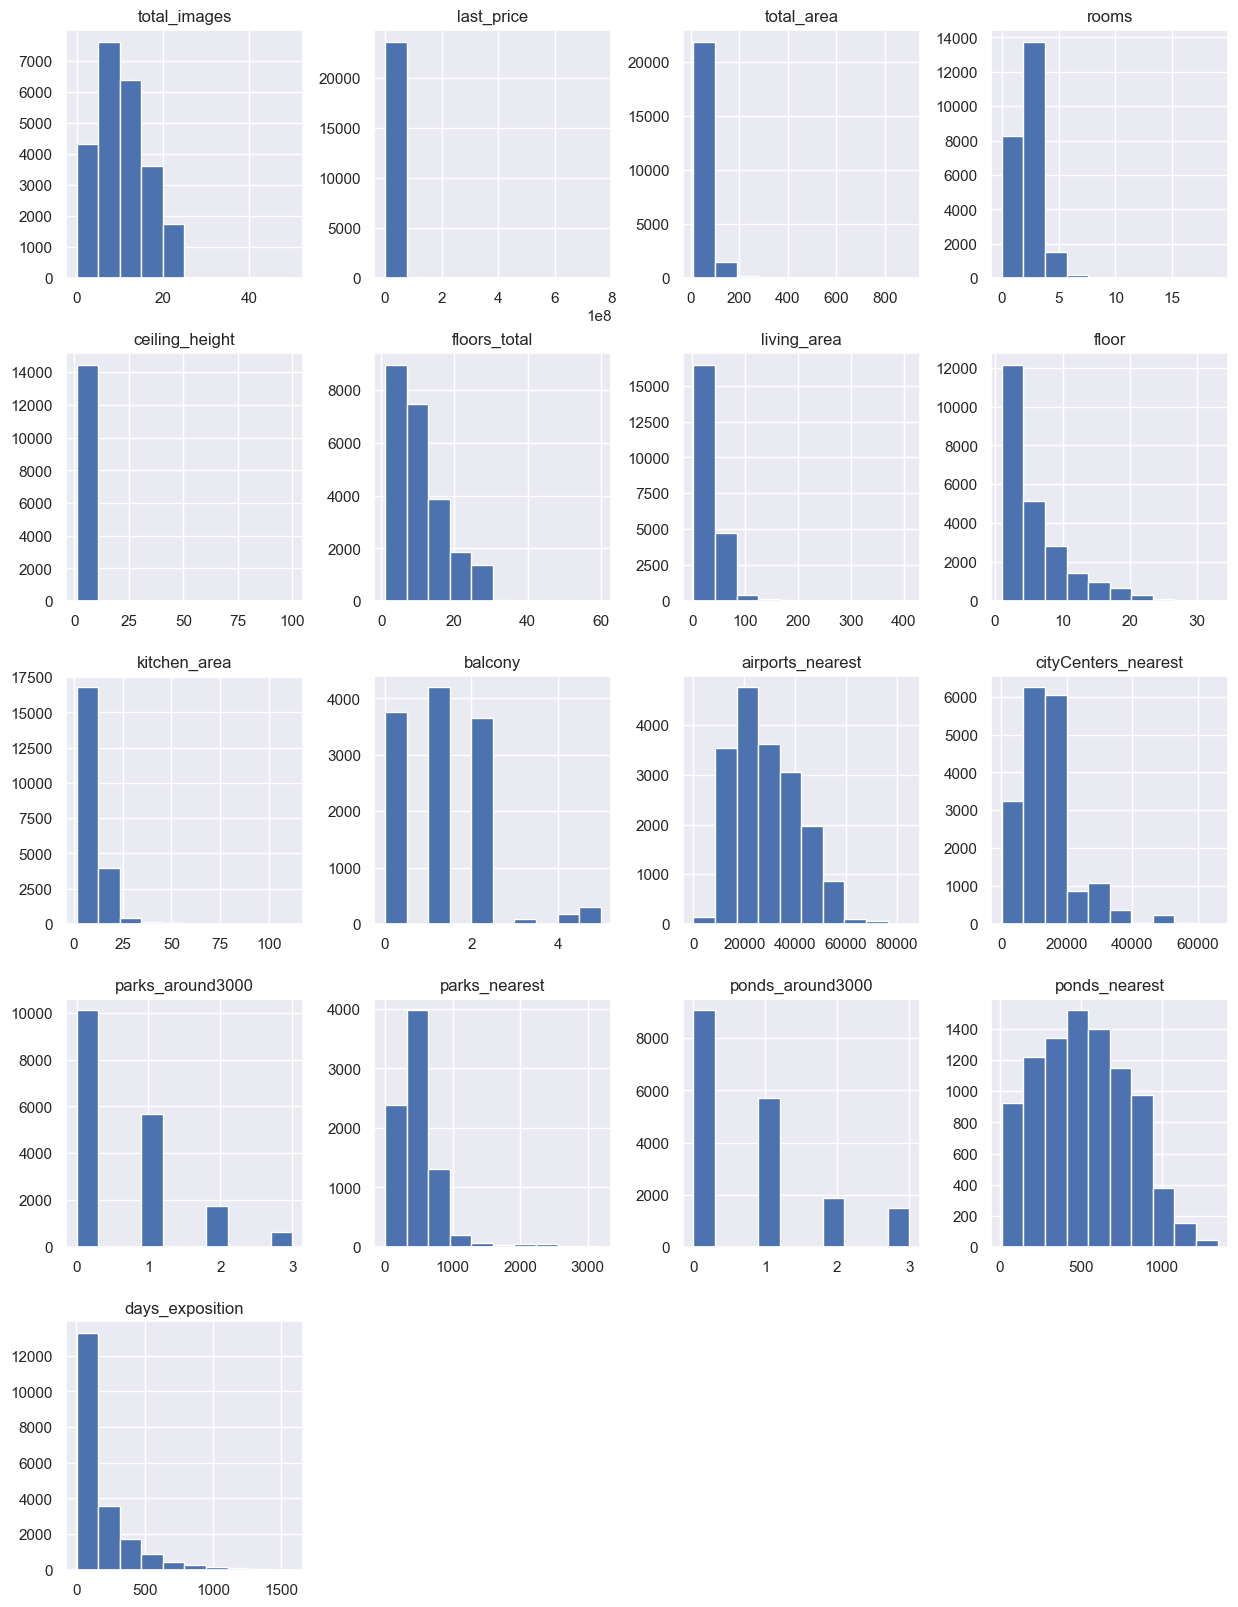

In [7]:
df.hist(figsize=(15, 20));

Графики, которые мы видим выше, не информативны. Мы не можем делать выводы по таким графикам. Например, график по показателю Lastprice показывает одну шкалу, по которой нельзя определить признаки этих данных и не видны особенности распределения. Соответственно, график является бесполезным. Для исправления таких ситуаций требуется выводить графики отдельно друг от друга и настраивать показатели Bins и Range, а также проводить фильтрацию данных перед построением графика, если это требуется.

## Предобработка данных

###  Пропущенные значения в столбцах

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Было обнаружено `14` столбцов котрые содержат в себе разное количество значений пропусков `NaN`. Причинами возникновения пропусков могут быть сбои в системе, человеческий фактор, нежелание пользователей делиться информацией, неправильная выгрузка данных, автозаполнение значений `NaN` при отсутсвии информации.

-----------

`ceiling_height`

Сгруппировали все строки по городам, медианное значение каждой группы записали на место пропущенных значений в группе. Признаков для группировки можно указать больше, для более точного определения группы.

In [9]:
for name, group in df.query('~ceiling_height.isna()').groupby('locality_name')['ceiling_height']:
    
        #Выбрали все значения ceiling_height не рано nan, для дальнейшего вычисления медианы
        
        #Сгруппировали по городу выбрав ceiling_height
        
    
    df.loc[(df.ceiling_height.isna()) & (df.locality_name == name), 'ceiling_height'] = group.median()
    
        #записали медиану вместо пропуска 
   

Ниже видно что медиану не получилось рассчитать только по тем группам в которых не хватает данных. Таких значений `156`, но если выполниь этот код после раздела Дубликаты, т их останется `95`

In [10]:
df.groupby('locality_name')['ceiling_height'].agg(['median','count']).tail()

,median,count
locality_name,,
село Путилово,3,2
село Рождествено,NaN,0
село Русско-Высоцкое,3,9
село Старая Ладога,NaN,0
село Шум,NaN,0


In [11]:
df[df.ceiling_height.isna()].shape[0]

156

--------------

`floors_total`

Так как пропущенных значений в этом столбце всего `86`, было решено оставить их без изменений. Причина возникновения пропусков точно не ясна, но возможно несколько причин человеческий фактор, сбой, умышленный пропуск.

------------

`living_area`

In [12]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,NaN,False,False,25,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,3,11,19,1,NaN,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,3,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,3,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121


Предварительно было принято решение оставить пропуски в столбце `living_area` пустыми, так как, пропусков всего `1903` из `23699` тысяч. Данных достаточно для того что бы сделать на основе них заключению о том, как данный показатель влияет на стоимость жилья. Конечно мы можем попытаться вычесть жилую площадь таких квартир исходя из строительных норм. Вся площадь является жилой кроме балкона, но в нашем сете видно что, в столбце `living_area` указана площадь за минусом кухни и балкона поэтому мы можем указать в столбце `living_area` значение из `(total_area - kitchen_area)`  если балкона нет. Но к сожалению получить существенный результат таким образом не получится так как по такой выборке очень мало данных.

In [14]:
df.query('~kitchen_area.isna() and living_area.isna() and balcony == 0').shape[0]

32

-------------

`is_apartment`

Заполнить пустые значения `is_apartment` мы также не можем так как мы только предполагаем какого рода недвижимость может означать столбец `is_apartment`, это могут быть разные типы апартаментов. В целом, не удается выяснить однозначно является ли недвижимость коммерческой или нет. В разных случаях цена на такую недвижимость могут отличаться от цены обычного жилья, в некоторых случаях например, цена квадратного метра может быть дешевле на 15-30% чем цена обычного жилья. Но даже если предположить что все значения NaN это некоммерческая недвижимость и пользователь просто не указал значение явно, мы получим две группы в которой из 23 тысяч значений всего 50 будут True, что указывает на недостаток данных в этой группе. Мы не можем делать выводы и сравнивать эту группу с группой в которой находится подавляющее большинство значений.

Пустые значения

In [15]:
df.query('is_apartment.isna()').shape[0]

20924

Значения `True`

In [16]:
df.query('is_apartment == True').shape[0]

50

Значения `False`

In [17]:
df.query('is_apartment == False').shape[0]

2725

Исходя из данных выше мы не можем определить что из себя представляет коммерческая недвижимость и поэтому не можем выявить меры этой группы.

--------------

`kitchen_area` 

С `kitchen_area` ситуация такая же как с `iving_area`, нам хватает данных для того чтобы сделать выводов так как обнаружено всего `2278` пропусков

In [18]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

-----------

`balcony`

Заполнять пропуски в столбце `balcony` мы придерживаемся мнения что если значения `NaN` то в квартире `0` балконов. Заполнить все пропуски значением `0`.

In [19]:
df['balcony'] = df['balcony'].fillna(0)

In [20]:
df.query('balcony > 0').shape[0]

8422

In [21]:
df.query('balcony == 0').shape[0]

15277

------------

`locality_name`

Пропусков в `locality_name` у нас всего 49, такое количество не повлияет на расчеты поэтому оставим значения пустыми.

Остальные столбца мы оставим пустыми, так как они являются картографическими и заполняются системой. Возможно, эти данные были потеряны при сборе, возможно, произошел сбой, либо система не смогла определить расстояние по каким то причинам, которые связаны с другими сервисами. Мы не можем присвоить всем пропущенным значениям медиану и таким образом обобщить все значения. Но мы могли бы заполнить эти показатели другим способом. Например, зная, что расстояние от центра города `Citycentersnearest` - это расстояние от центра города Санкт - Петербурга, мы могли бы в каждом населенном пункте вычислить среднюю удаленность от центра и присвоить это значение на место пропусков в каждой группе городов. Мы могли бы поступить подобным образом и с `Airportsnearest`. К сожалению, описание указанных столбцов неоднозначно.

А в Санкт-петербурге Мы можем определить среднюю цену одного квадратного метра максимально близко к центру и вычислить, на сколько процентов отличается стоимость жилья со значением Nan в столбце `Citycentersnearest` от схожего по параметрам жилья, которое находится в центре или близко к нему. Далее мы могли бы вычислить примерную отдаленность от центра.

Что касается столбца `Parksnearest`, мы могли бы его заполнить, исходя из логике, что если столбец `Parksaround3000` содержит значения больше 0, то мы можем записать значение 3000м в столбец `Parksnearest`. Но, к сожалению, выборка с такими условиями не содержит никаких данных. Это продемонстрировано ниже. Аналогичная ситуация и с `Pondsaround3000` и `Pondsnearest`.

Мы можем заполнить столбец `Daysexposition` медианой по населенным пунктам. Этот показатель не влияет на стоимость жилья, а также пустых значений в нем 3181, что не мешает нам сделать выводы о том, в каком городе и какое жилье пользуется большим спросом.
         

In [22]:
df.query('ponds_around3000 > 0 and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [23]:
df.query('parks_around3000 > 0 and parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


------------

Вывод: Картографические данные отсутствуют в большинстве случаев за пределами Санкт-Петербурга, у этого могут быть разные причины, например некорректная работа системы, сбои, человеческий фактор.

### Типы данных столбцов 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23543 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец `first_day_exposition` содержит дату публикации объявления. Столбец имеет тип `object`, данные записаны в формате `2019-03-07T00:00:00`. Необходимо изменить тип данных так как строка содержащая дату не может обеспечить функционал объекта `datetime`, с ней неудобно работать. Есть подозрение что время в каждой ячейке одинаково `00:00:00`, если это так то следует удалить эту часть строки и после этого назначить столбцу тип `datetime`. 

Разделяем строку по символу `T`

In [25]:
unique_time = df['first_day_exposition'].str.split('T')

Удаляем из получившегося списка все строки `00:00:00`. Если там присутствуют отличающиеся значения от `00:00:00` то будет выведено сообщение об ошибке.

In [26]:
try:
    
     result = [ item.remove('00:00:00') for item in unique_time]
        
        #проходим по списку и удаляем все значения соотвествующие шаблону
        
        #если значение не соответсвует шаблону то фенкция remove возбудит исключение
        
except: 
    
    print('Sorry! list can contain unexpected value please cheack it')

Перезаписываем столбец в новом формате.

In [27]:
df['first_day_exposition'] = [item[0] for item in unique_time]

Изменили тип солбца на datetime.

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

---------

Обнаружено что столбец `is_apartment` имеет тип `object`, хотя имеет он характер типа `bool` и принимает два значения `True` и `False`. Было принято решение, не менять тип столбца, так как при смене типа на bool все значения NaN будут приведены к значению False и таким образом  это может исказить дальнейшие результаты. На всякий случай проверим уникальность значений которые присутствуют в столбце.

In [29]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

### Дубликаты

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23543 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Проверим и удалим явные дубликаты.

In [31]:
df.duplicated().sum()

0

Проверим столбец `locality_name` на наличие неявных дубликатов

In [32]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Самое первое что бросается в глаза, это заглавные буквы и буква `ё`. Приведем все строки к нижнему регистру и заменим букву `ё` на `е`.

In [33]:
concat = lambda col: 'е'.join(col.split('ё')) if type(col) == str else col # поиск и удаление (ё)

In [34]:
df['locality_name'] = df['locality_name'].apply(concat)

In [35]:
df['locality_name'] = df['locality_name'].str.lower() #изменить регистр с помощью функции lower()

In [36]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Привели все к нижнему регистру и заменили букву `ё`. Для удобства дальнейшей работы, было принято решение разделить по разным столбцам название населенного пункта и статус.

Копируем столбец

In [37]:
df['locality_status'] = df['locality_name']

Создаем шаблоны для очистки данных

In [38]:
pattern = ['поселок городского типа','станции','при железнодорожной станции',
           'при железнодорожной ','коттеджный','поселок',
           'садоводческое некоммерческое товарищество','село','деревня',
           'городской поселок','садовое товарищество','коттеджный поселок','городской']

Очищаем столбец `locality_name`

In [39]:
for i in pattern:  
    
    df['locality_name'] = (
                            df['locality_name'].apply(
                                
                                                        lambda col: ''.join(col.split(i)) if type(col) == str else col
                            )
        
    #если значение является строкой то разделить по шаблону списка и удалить шаблон из строки
        
    #иначе функция фозвращает значение обратно   
    )
    
    
    df['locality_name'] = df['locality_name'].str.strip()
    
    #удалить пробел в последней строке

In [40]:
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

Заполним  все пропуски значением `unknown` так как выяснить название населенного пункта не получится.
Далее заполняем столбец со статусом населенного пункта.

In [41]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [42]:
for i in df['locality_name'].unique():  
    
    df['locality_status'] = (
        
                            df['locality_status'].apply(
                                
                                                        lambda col: ''.join(col.split(i)) if type(col) == str else col
                            
                            )

   
      #если значение является строкой то разделить по шаблону списка и удалить шаблон из строки
        
      #иначе функция фозвращает значение обратно 
    )
    
    df['locality_status'] = df['locality_status'].str.strip()
    
      #удалить пробел в последней строке

In [43]:
df['locality_status'].unique()

array(['', 'поселок', 'городской поселок', 'деревня',
       'поселок городского типа', 'садовое товарищество', 'село', nan,
       'поселок станции', 'поселок  малукса', 'деревня старые',
       'поселок усть-', 'поселок поселок', 'село  ладога',
       'деревня стсиверская', 'деревня сте хинколово', 'деревня стполье',
       'садоводческое некоммерческое товарищество', 'поселок городок',
       'поселок гончво', 'поселок ский',
       'поселок при железнодорожной станции', 'деревня  пустошь',
       'поселок ы', 'коттеджный поселок', 'городской поселок строй',
       'деревня трубников', 'поселок пансионат зеленый', 'деревня малая',
       'деревня исова грива'], dtype=object)

Cанкт-Петербург не имеет статус. Это необходимо исправить.

In [44]:
df.loc[df['locality_status'] == '', 'locality_status'] = 'город'

In [45]:
df['locality_status'].unique()

array(['город', 'поселок', 'городской поселок', 'деревня',
       'поселок городского типа', 'садовое товарищество', 'село', nan,
       'поселок станции', 'поселок  малукса', 'деревня старые',
       'поселок усть-', 'поселок поселок', 'село  ладога',
       'деревня стсиверская', 'деревня сте хинколово', 'деревня стполье',
       'садоводческое некоммерческое товарищество', 'поселок городок',
       'поселок гончво', 'поселок ский',
       'поселок при железнодорожной станции', 'деревня  пустошь',
       'поселок ы', 'коттеджный поселок', 'городской поселок строй',
       'деревня трубников', 'поселок пансионат зеленый', 'деревня малая',
       'деревня исова грива'], dtype=object)

Исправим значения которые остались некоректными.

In [46]:
pattern = [
       'поселок городского типа',
       'поселок станции', 'поселок  малукса', 'деревня старые',
       'поселок усть-', 'поселок поселок', 'село  ладога',
       'деревня стсиверская', 'деревня сте хинколово', 'деревня стполье',
       'поселок городок','поселок гончво', 'поселок ский',
       'поселок при железнодорожной станции', 'деревня  пустошь',
       'поселок ы', 'деревня трубников', 'поселок пансионат зеленый', 'деревня малая',
       'деревня исова грива']

In [47]:
for i in pattern:  
    
    
    df['locality_status'] = (
                                df['locality_status'].apply(
                                    
                                                            lambda col: ''.join(col.split(' ')[0]) if i == col else col
                                
                                )
        
      #если значение серии и шаблона совпадают то разделить по шаблону списка и вернуть первое значение
        
      #иначе функция фозвращает значение обратно  
    )
    
    
    df['locality_status'] = df['locality_status'].str.strip()
    
    #удалить пробел в последней строке

In [48]:
df['locality_status'].unique()

array(['город', 'поселок', 'городской поселок', 'деревня',
       'садовое товарищество', 'село', nan,
       'садоводческое некоммерческое товарищество', 'коттеджный поселок',
       'городской поселок строй'], dtype=object)

In [49]:
df['locality_status'] = df['locality_status'].replace({
                                                       'коттеджный поселок':'поселок',
                                                       'городской':'городской поселок',
                                                       'городской поселок':'поселок',
                                                       'городской поселок строй':'поселок',
                                                       'садоводческое некоммерческое товарищество':'садовое товарищество'})

In [50]:
df['locality_status'] = df['locality_status'].fillna('unknown')

In [51]:
df['locality_status'].unique()

array(['город', 'поселок', 'деревня', 'садовое товарищество', 'село',
       'unknown'], dtype=object)

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город
3,0,64900000,159,2015-07-24,3,3,14,NaN,9,NaN,False,False,NaN,0,санкт-петербург,28098,6800,2,84,3,234,424,город
4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город


### Выбивающиеся значения

Для начала поиска выбивающихся значений было принято решение просмотреть все столбцы на наличие отрицательных значений в столбцах типа `int` и `float`.

In [53]:
for i in df.columns:
    #проходим циклом по названиям столбцов
   
    try:
        print(i, np.sign(df[i]).unique())
        #np.sign возвращает -1 если значение отрицательное 0 если значение является нулевым и 1 если значение положительно NaN если отсутствует
        
        #выводим название столбца и список значений которые возвращает np.sign
        
        #если столбец не числовой то возникает иключение которые мы пропускаем и переходим к следующему
    except: pass

total_images [1 0]
last_price [1.]
total_area [1.]
rooms [1 0]
ceiling_height [ 1. nan]
floors_total [ 1. nan]
living_area [ 1. nan]
floor [1]
kitchen_area [ 1. nan]
balcony [0. 1.]
airports_nearest [ 1. nan  0.]
cityCenters_nearest [ 1. nan]
parks_around3000 [ 1.  0. nan]
parks_nearest [ 1. nan]
ponds_around3000 [ 1.  0. nan]
ponds_nearest [ 1. nan]
days_exposition [nan  1.]


Как видно из результата выше, отрицательных значений в наших столбцах нет.

-----------

Есть смысл проверить выбивающиеся значения в столбце total_area, а конкретно проверить минимальное значение, так как слишком маленькая площадь например 1 квадратный метр это скорее выбивающиеся значение.

In [54]:
df.total_area.min()

12.0

Такая минимальная площадь может быть реальна.

----------

Проверим ceiling_height. выведем все уникальные значения, возможно мы сможем увидеть общую картину таким образом.

In [55]:
df.ceiling_height.unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,     nan,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,
         2.71 ,   4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,
         3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,
        13.85 ,   2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,
         2.66 ,   2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,
         3.11 ,   3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,
         3.12 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,
         2.79 ,   2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,
         2.83 ,   4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,
         3.18 ,   3.35 ,   2.3  ,   3.57 ,   2.48 ,   2.515,   2.62 ,
         2.82 ,   2.65 ,   3.98 ,   3.83 ,  27.   ,   3.52 ,   3.95 ,
         3.75 ,   2.

Видно что присутствуют слишком большие значения `26`, `27`, `100`. Такая высота потолков скорее всего аномалия. Постараемся привести эти значения в порядок. Будем считать все потолки выше 10 метров аномалией.

In [56]:
df[df.ceiling_height > 10].ceiling_height

313      14
355      25
2158     27
3148     32
4643     25
4876     27
5076     24
5246     27
5669     26
5807     27
6246     25
9379     25
10067    14
10069    14
10773    27
11285    25
14382    25
15061    14
17496    20
17857    27
18545    25
20478    27
20507    23
21377    28
21824    27
22309    10
22336    32
22869   100
22938    27
Name: ceiling_height, dtype: float64

Разделим все эти значения на 10 для получения адекватных значений.

In [57]:
df.loc[df.ceiling_height > 10, 'ceiling_height'] = df[df.ceiling_height > 10].ceiling_height / 10

In [58]:
df[df.ceiling_height > 10].ceiling_height

Series([], Name: ceiling_height, dtype: float64)

In [59]:
df.ceiling_height.unique()

array([ 2.7  ,  2.63 ,  3.03 ,  2.6  ,  2.64 ,  2.5  ,  2.67 ,  2.55 ,
        2.56 ,  3.05 ,  2.75 ,  2.9  ,  2.56 ,  2.8  ,  3.   ,  2.65 ,
        3.2  ,  2.61 ,    nan,  3.25 ,  3.45 ,  2.77 ,  2.85 ,  2.525,
        2.57 ,  4.15 ,  3.5  ,  3.3  ,  2.71 ,  4.   ,  2.47 ,  2.73 ,
        2.84 ,  3.1  ,  2.34 ,  3.4  ,  2.52 ,  3.06 ,  2.72 ,  2.54 ,
        2.51 ,  2.78 ,  1.385,  2.76 ,  2.58 ,  3.7  ,  5.2  ,  2.87 ,
        2.66 ,  2.59 ,  2.   ,  2.45 ,  3.6  ,  3.9  ,  2.92 ,  3.11 ,
        3.13 ,  3.8  ,  3.15 ,  3.55 ,  3.16 ,  3.62 ,  3.12 ,  2.53 ,
        2.74 ,  2.96 ,  2.46 ,  5.3  ,  5.   ,  2.79 ,  2.95 ,  4.06 ,
        2.94 ,  3.82 ,  3.54 ,  3.53 ,  2.83 ,  4.7  ,  2.4  ,  3.38 ,
        3.01 ,  5.6  ,  3.65 ,  3.18 ,  3.35 ,  2.3  ,  3.57 ,  2.48 ,
        2.515,  2.62 ,  2.82 ,  2.65 ,  3.98 ,  3.83 ,  3.52 ,  3.95 ,
        3.75 ,  2.88 ,  3.67 ,  3.87 ,  3.66 ,  3.85 ,  3.86 ,  4.19 ,
        3.24 ,  4.8  ,  4.5  ,  4.2  ,  3.36 ,  3.08 ,  3.68 ,  3.07 ,
      

Но кажется это еще не все. Присутствуют аномально низкие значения, такие как 1 метр. Взглянем на эти данные. 

In [60]:
df[df.ceiling_height < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
313,1,2450000,49,2016-03-09,3,1,5,34,2,NaN,False,False,6,1,новый свет,NaN,NaN,NaN,NaN,NaN,NaN,189,поселок
5712,5,1500000,43,2017-08-14,2,1,2,28,1,NaN,False,False,5,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248,поселок
10067,5,2100000,36,2016-04-29,1,1,5,18,5,NaN,False,False,8,0,новый свет,NaN,NaN,NaN,NaN,NaN,NaN,206,поселок
10069,6,2000000,46,2017-09-25,2,1,5,30,1,NaN,False,False,6,0,новый свет,NaN,NaN,NaN,NaN,NaN,NaN,10,поселок
15061,19,5600000,56,2018-05-11,2,1,14,32,5,NaN,False,False,9,2,санкт-петербург,14814,13610,0,NaN,0,NaN,315,город
16934,5,4100000,40,2017-10-17,1,2,37,17,5,NaN,False,False,8,0,санкт-петербург,18732,20444,0,NaN,3,80,71,город
22309,20,5300000,45,2017-09-30,1,1,16,16,15,NaN,False,False,NaN,0,санкт-петербург,36353,11936,2,440,2,450,136,город
22590,16,6000000,55,2018-10-31,2,1,12,32,7,NaN,False,False,10,0,санкт-петербург,33053,14217,2,293,2,289,13,город


Мы видим что таких значений не много, но их можно привести в порядок, мы видим что это довольно дорогое жилье имеют достаточно большую квадратуру, вряд ли там потолки высотой всего лишь метр. Поменяем значение на медиану.

In [61]:
df.loc[df.ceiling_height < 2, 'ceiling_height'] = df.query(
                                                          'locality_name == "санкт-петербург" and \
                                                           10000 <= cityCenters_nearest <= 20000 and \
                                                           40 <= total_area <= 60 and \
                                                           1500000 <= last_price <= 6000000' \
                                                           ).ceiling_height.median()

In [62]:
df.ceiling_height.unique()

array([ 2.7  ,  2.63 ,  3.03 ,  2.6  ,  2.64 ,  2.5  ,  2.67 ,  2.55 ,
        2.56 ,  3.05 ,  2.75 ,  2.9  ,  2.56 ,  2.8  ,  3.   ,  2.65 ,
        3.2  ,  2.61 ,    nan,  3.25 ,  3.45 ,  2.77 ,  2.85 ,  2.525,
        2.57 ,  4.15 ,  3.5  ,  3.3  ,  2.71 ,  4.   ,  2.47 ,  2.73 ,
        2.84 ,  3.1  ,  2.34 ,  3.4  ,  2.52 ,  3.06 ,  2.72 ,  2.54 ,
        2.51 ,  2.78 ,  2.76 ,  2.58 ,  3.7  ,  5.2  ,  2.87 ,  2.66 ,
        2.59 ,  2.   ,  2.45 ,  3.6  ,  3.9  ,  2.92 ,  3.11 ,  3.13 ,
        3.8  ,  3.15 ,  3.55 ,  3.16 ,  3.62 ,  3.12 ,  2.53 ,  2.74 ,
        2.96 ,  2.46 ,  5.3  ,  5.   ,  2.79 ,  2.95 ,  4.06 ,  2.94 ,
        3.82 ,  3.54 ,  3.53 ,  2.83 ,  4.7  ,  2.4  ,  3.38 ,  3.01 ,
        5.6  ,  3.65 ,  3.18 ,  3.35 ,  2.3  ,  3.57 ,  2.48 ,  2.515,
        2.62 ,  2.82 ,  2.65 ,  3.98 ,  3.83 ,  3.52 ,  3.95 ,  3.75 ,
        2.88 ,  3.67 ,  3.87 ,  3.66 ,  3.85 ,  3.86 ,  4.19 ,  3.24 ,
        4.8  ,  4.5  ,  4.2  ,  3.36 ,  3.08 ,  3.68 ,  3.07 ,  3.37 ,
      

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23543 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

----

Проверим `kitchen_area`

In [64]:
df.kitchen_area.unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [65]:
df.query('kitchen_area > 30').kitchen_area.unique()

array([ 41.  ,  50.  ,  33.8 ,  35.  ,  40.  ,  49.2 ,  36.  ,  77.  ,
        31.  ,  36.6 ,  31.2 ,  63.  ,  66.  ,  42.6 ,  32.  ,  35.35,
        30.2 ,  46.  ,  32.1 ,  43.  ,  39.  ,  37.8 , 100.7 ,  40.2 ,
        60.  ,  33.  ,  36.2 ,  38.  ,  37.  ,  31.7 ,  30.9 ,  35.05,
        36.5 ,  42.  ,  48.  ,  30.5 ,  45.  ,  44.  ,  56.2 ,  36.3 ,
        37.7 ,  32.8 ,  40.4 ,  31.47, 100.  ,  34.19,  42.4 ,  44.9 ,
        51.  ,  31.73,  70.  ,  39.9 ,  46.8 ,  34.78,  42.5 ,  43.4 ,
        63.4 ,  41.9 ,  45.5 ,  33.9 ,  42.8 ,  58.4 ,  53.1 ,  41.3 ,
        31.8 ,  42.7 ,  40.5 ,  40.3 ,  32.55,  32.3 ,  34.  ,  34.7 ,
        56.  ,  87.2 ,  30.59,  37.9 ,  47.  ,  51.8 ,  40.7 ,  36.4 ,
        43.2 ,  44.7 ,  37.6 ,  34.8 ,  35.5 ,  62.  ,  34.3 ,  48.5 ,
        30.6 ,  33.1 ,  33.6 ,  37.5 ,  34.1 ,  43.8 ,  39.1 ,  32.7 ,
        75.  ,  34.51,  35.6 ,  54.3 ,  62.5 ,  35.4 ,  64.  ,  37.78,
        38.1 ,  93.2 ,  31.6 ,  72.  ,  93.  ,  32.9 ,  55.7 ,  35.9 ,
      

Кажутся странными огромные кухни больше `30` квадратных метров в столбце `kitchen_area`. Проверим эти данные и посмотрим что из себя представляет эта недвижимость. Проверим общую площадь.

In [66]:
df.query('kitchen_area > 30').total_area.unique()

array([100.  , 161.  , 179.6 , 119.  , 158.  , 140.6 ,  96.  , 216.  ,
        69.  , 131.  , 200.  ,  81.  , 310.  ,  99.2 , 323.  , 201.  ,
       122.1 ,  52.  ,  66.  , 190.  , 141.  , 103.2 , 168.  , 200.3 ,
       114.  , 113.  , 153.  , 115.5 , 116.  ,  62.4 , 128.  , 142.1 ,
        72.  , 160.  , 255.  , 103.  , 148.3 ,  73.  , 631.  , 107.  ,
       123.2 ,  89.  , 179.  , 214.  , 134.  ,  97.4 , 115.7 , 115.  ,
       441.98,  80.  , 106.  , 100.5 , 220.  , 127.  , 186.  , 136.  ,
       150.  ,  56.6 , 121.  , 175.  , 123.  , 156.  ,  82.7 , 146.3 ,
        84.  , 174.  , 290.  , 240.  ,  65.9 ,  60.4 , 126.  , 228.  ,
       152.7 , 380.  , 110.  , 590.  ,  95.7 , 105.6 , 500.  , 117.4 ,
       124.1 , 140.  , 363.1 ,  96.7 , 230.  , 149.3 , 470.3 , 101.  ,
        58.5 , 178.3 , 118.  ,  82.  , 488.  ,  93.  , 146.8 , 100.7 ,
        90.  ,  85.  , 307.8 , 131.1 , 315.  , 165.  , 105.  , 204.  ,
       312.  , 507.  ,  95.3 , 237.  ,  76.2 , 130.  , 203.3 , 112.4 ,
      

Посмотрим что это за недвижимость

In [67]:
df.query('kitchen_area > 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город
51,7,45000000,161,2017-10-17,3,3,8,38,4,NaN,False,False,50,0,санкт-петербург,32537,6589,0,NaN,3,99,541,город
147,10,27700000,180,2017-07-06,5,3,25,97,25,NaN,False,False,34,2,санкт-петербург,19424,4489,0,NaN,1,806,75,город
239,16,22000000,119,2017-02-16,3,4,5,56,3,False,False,False,35,0,санкт-петербург,21698,2004,1,688,1,86,77,город
262,14,37500000,158,2019-01-24,4,3,12,88,4,NaN,False,False,40,0,санкт-петербург,25799,4593,0,NaN,2,840,NaN,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23181,20,22220000,171,2019-02-12,4,3,5,82,4,NaN,False,False,35,0,санкт-петербург,24503,4909,1,230,0,NaN,NaN,город
23327,19,34400000,215,2019-03-15,5,3,4,82,4,NaN,False,False,40,0,санкт-петербург,37268,15419,0,NaN,0,NaN,NaN,город
23395,4,40000000,188,2017-05-29,6,3,6,110,4,NaN,False,False,31,0,санкт-петербург,23390,2254,2,425,1,62,30,город
23400,17,30000000,213,2017-09-28,7,3,5,151,5,NaN,False,False,31,0,санкт-петербург,21146,1225,2,342,3,30,299,город


Большинство квартир/домов с большими кухнями имеют большую площадь и стоимость. Скорее всего с данными все в порядке.

Посмотрим выбросы в переменнной last_price. Посмотрим самое малое значение. Сохраним изначальный размер фрейма.

In [68]:
old_df = df

In [69]:
df.last_price.min()

12190.0

In [70]:
df.query('last_price == 12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
8793,7,12190,109,2019-03-20,2,3,25,32,25,NaN,False,False,40,0,санкт-петербург,36421,9176,1,805,0,NaN,8,город


Итак мы видим что в таблице есть недвижимость стоимость которой 12 190. При этом недвижимость имеет 109 квадратных метров площади, 2 комнаты, потолки высотой 3 метра. Этого нам достаточно чтобы сделать вывод о том, что такая запись является выбросом. Проверим дригие объекты. Посмотрим на недвижимость стоимостью(на вскидку) до миллиона.

In [71]:
df.query('last_price < 1000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
164,6,800000,40,2018-06-25,2,3,3,NaN,1,NaN,False,False,NaN,2,ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81,поселок
247,7,650000,31,2017-01-20,1,2,3,NaN,1,NaN,False,False,NaN,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,378,город
259,6,900000,30,2017-11-21,1,2,5,15,4,NaN,False,False,5,1,ивангород,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город
268,7,650000,46,2018-03-15,2,2,5,30,5,NaN,False,False,7,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,75,город
293,2,900000,43,2017-06-14,2,3,5,32,5,NaN,False,False,5,0,сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,247,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,8,600000,32,2019-04-24,1,3,2,20,1,NaN,False,False,7,0,коркино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,деревня
23153,9,650000,41,2017-10-13,2,4,3,28,1,NaN,False,False,6,0,бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,14,город
23354,18,900000,43,2018-02-26,2,NaN,2,28,1,NaN,False,False,9,0,тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219,деревня
23484,11,470000,44,2018-07-02,2,2,2,28,2,NaN,False,False,8,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298,город


По таблице видно что очень часто встречаются двухкомнатные квартиры стоимостью до миллиона с внушительной площадью, высокими потолками. Можно предположить что человек просто забыл дописать ноль, и дописать самостоятельно, но все же такие значения лучше отбросить. Мы обрежем ровно 1 процент датаврейма. Следом посмотрим на самые большие значения.

In [72]:
lop_one = df.last_price.quantile(0.01)

In [73]:
df.last_price.max()

763000000.0

In [74]:
df.query('last_price == 763000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
12971,19,763000000,400,2017-09-30,7,3,10,250,10,NaN,False,False,NaN,2,санкт-петербург,25108,3956,1,530,3,756,33,город


In [75]:
lop_two = df.last_price.quantile(0.99)

In [76]:
df = df.query('@lop_one < last_price < @lop_two')

In [77]:
df.shape[0]/ old_df.shape[0]

0.9795350014768556

In [78]:
df.rooms.max()

19

Посмотрим сколько объектов с количеством больше 10.

In [79]:
df.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
648,3,17500000,184,2018-07-01,11,3,7,139,7,NaN,False,False,13,0,санкт-петербург,23606,3148,0,NaN,0,NaN,NaN,город
866,5,25000000,363,2017-12-23,14,3,5,222,4,NaN,False,False,17,0,санкт-петербург,38076,7950,0,NaN,2,435,418,город
9688,8,33000000,194,2017-02-07,11,3,5,129,2,NaN,False,False,12,0,санкт-петербург,21469,1015,1,686,2,66,813,город
14498,6,32250000,375,2018-06-09,19,3,5,264,2,NaN,False,False,28,0,санкт-петербург,19497,3574,0,NaN,2,548,114,город
18848,6,28500000,270,2015-03-02,16,3,4,180,4,NaN,False,False,13,1,санкт-петербург,23575,4142,1,516,0,NaN,1365,город
20829,6,28659000,245,2016-03-31,14,3,4,168,2,NaN,False,False,26,0,санкт-петербург,21104,2054,3,541,2,118,95,город


Смотрим сколько с количеством 0.

In [80]:
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
144,1,2450000,27,2017-03-30,0,3,24,16,2,NaN,True,False,NaN,2,мурино,NaN,NaN,NaN,NaN,NaN,NaN,181,поселок
349,4,2320000,25,2017-09-27,0,3,14,17,1,NaN,False,True,NaN,0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45,деревня
440,8,2480000,27,2018-03-12,0,3,17,25,4,NaN,True,False,NaN,2,санкт-петербург,38171,15015,0,NaN,2,982,64,город
508,0,3375000,34,2017-03-28,0,3,26,24,19,NaN,False,True,NaN,1,парголово,53115,19292,0,NaN,1,593,430,поселок
608,2,1850000,25,2019-02-20,0,3,10,NaN,7,NaN,True,False,NaN,0,шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,поселок
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01,0,3,25,18,16,NaN,True,False,NaN,0,санкт-петербург,11405,13222,0,NaN,1,623,14,город
23442,0,2500000,28,2017-09-28,0,3,24,18,4,NaN,False,True,NaN,2,мурино,NaN,NaN,NaN,NaN,NaN,NaN,4,поселок
23554,15,3350000,26,2018-09-07,0,3,19,NaN,8,NaN,True,False,NaN,0,санкт-петербург,18090,17092,0,NaN,2,112,31,город
23592,10,1450000,29,2017-11-11,0,3,9,18,8,NaN,False,True,NaN,2,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82,город


Просто отфильтруем их 

In [81]:
df = df.query('0 < rooms <= 10')

In [82]:
round(df.shape[0]/ old_df.shape[0],2)

0.97

Посмотрим на минимальную и максимальную площадь.

In [83]:
df.total_area.max()

470.3

In [84]:
df.total_area.min()

12.0

In [85]:
df.query('total_area < 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
17961,3,1400000,13,2017-12-03,1,3,9,NaN,1,NaN,False,False,NaN,0,санкт-петербург,14350,15945,0,NaN,1,185,410,город
19546,3,1850000,13,2019-03-11,1,3,5,NaN,2,False,False,False,NaN,0,санкт-петербург,24915,5483,1,644,0,NaN,24,город
19558,2,1686000,13,2018-12-17,1,3,5,NaN,1,NaN,False,False,NaN,0,санкт-петербург,19891,4165,1,361,1,155,19,город
19642,5,1190000,14,2018-07-29,1,3,5,11,1,NaN,False,False,2,0,санкт-петербург,9898,11122,0,NaN,0,NaN,4,город
19807,0,3800000,13,2018-07-04,1,3,5,10,3,NaN,False,False,NaN,0,санкт-петербург,21302,1242,1,592,3,27,9,город
19904,4,2400000,12,2017-07-19,1,3,5,10,2,NaN,False,False,NaN,0,санкт-петербург,21314,964,1,886,2,45,200,город


In [86]:
df.query('total_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
521,20,25717300,230,2015-01-21,3,3,3,130,1,NaN,False,False,26,1,пушкин,16877,29030,2,676,3,278,1441,город
681,20,24900000,249,2015-08-13,7,3,5,180,4,NaN,False,False,NaN,1,санкт-петербург,24810,6108,0,NaN,0,NaN,781,город
813,7,16500000,229,2016-02-25,8,3,6,160,5,NaN,False,False,25,0,санкт-петербург,23968,4536,1,243,0,NaN,806,город
907,2,19500000,211,2018-02-22,6,3,7,140,4,NaN,False,False,15,1,санкт-петербург,20581,2279,2,251,3,70,125,город
1187,10,25000000,201,2015-08-07,5,4,6,131,4,False,False,False,35,0,санкт-петербург,26752,5458,3,445,0,NaN,1117,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000,298,2018-09-09,6,3,4,182,2,NaN,False,False,22,0,санкт-петербург,20630,1229,3,189,3,40,42,город
23281,20,24800000,231,2015-01-21,6,3,5,100,4,NaN,False,False,27,0,санкт-петербург,21480,2453,3,75,1,795,NaN,город
23327,19,34400000,215,2019-03-15,5,3,4,82,4,NaN,False,False,40,0,санкт-петербург,37268,15419,0,NaN,0,NaN,NaN,город
23400,17,30000000,213,2017-09-28,7,3,5,151,5,NaN,False,False,31,0,санкт-петербург,21146,1225,2,342,3,30,299,город


In [87]:
lop_total_area = df.total_area.quantile(0.99)

In [88]:
df = df.query('total_area < @lop_total_area')

In [89]:
round(df.shape[0]/ old_df.shape[0],2)

0.96

In [90]:
df = df.query('total_area > 15')

In [91]:
round(df.shape[0]/ old_df.shape[0],2)

0.96

In [92]:
df.kitchen_area.min()

1.3

In [93]:
df.query('kitchen_area <= 3').shape[0]

16

In [94]:
df.query('kitchen_area < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status
906,15,2600000,27,2017-07-10,1,3,23,18,18,NaN,False,False,2,0,санкт-петербург,22131,17459,0,NaN,1,411,10,город
6262,9,3100000,24,2018-06-25,2,3,5,16,5,NaN,False,False,2,0,санкт-петербург,31960,4914,2,426,1,936,54,город
7950,3,5967734,66,2017-02-07,2,3,4,44,2,False,False,False,3,0,санкт-петербург,44870,20802,0,NaN,0,NaN,335,город
8729,9,2200000,18,2018-08-20,1,3,3,14,3,NaN,False,False,2,0,пушкин,20710,30687,0,NaN,1,155,59,город
9138,17,2920000,23,2018-12-12,1,3,3,21,1,NaN,False,False,2,0,санкт-петербург,19506,4008,0,NaN,2,45,107,город
11033,6,5350000,32,2016-04-20,1,3,14,16,10,NaN,False,False,2,0,санкт-петербург,19008,3953,0,NaN,1,69,210,город
16367,2,2720000,26,2017-10-30,1,3,19,23,11,NaN,False,False,2,0,санкт-петербург,14472,13268,0,NaN,0,NaN,109,город
17834,5,2940000,35,2017-10-09,1,3,26,16,14,NaN,False,False,2,1,мурино,NaN,NaN,NaN,NaN,NaN,NaN,318,поселок
20217,7,4250000,28,2019-05-01,1,3,14,20,10,NaN,False,False,1,0,санкт-петербург,37199,12721,0,NaN,0,NaN,NaN,город
21419,4,1870000,20,2018-03-06,1,2,5,14,1,NaN,False,False,2,0,санкт-петербург,16652,15654,1,619,1,937,45,город


In [95]:
df = df.query('kitchen_area.isna() or kitchen_area > 3')

In [96]:
df.kitchen_area.isna().sum()

1973

In [97]:
round(df.shape[0]/ old_df.shape[0],2)

0.96

In [98]:
df = df.reset_index(drop=True)

## Добавьте в таблицу новые столбцы со следующими параметрами

Добавим столбец который будет содержать значение стоимости одного квадратного метра. Назовем его sqrm

In [99]:
df['price_sqrm'] = round(df['last_price'] / df['total_area'],1)

In [100]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066


-----------

Добавим столбец который будет содержать день недели публикации объявления. Назовем его name_of_weekday.

In [101]:
name_of_day = {
    
                0:'понедельник',
                1:'вторник',
                2:'среда',
                3:'четверг',
                4:'пятница',
                5:'суббота',
                6:'воскресенье',
}

In [102]:
get_name_of_day = lambda x: name_of_day[x]

In [103]:
df['weekday'] = df['first_day_exposition'].dt.weekday.apply(get_name_of_day)

In [104]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник


-----------

Добавим столбец который будет содержать месяц публикации объявления

In [105]:
df['month'] = df['first_day_exposition'].dt.month

In [106]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9


---------

Добавим столбец который будет содержать год публикации объявления

In [107]:
df['year'] = df['first_day_exposition'].dt.year

In [108]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018


----------

Добавим столбец который будет содержать тип этажа квартиры

In [109]:
def get_type_floor(floor, floors_total):
    
    type_floor = []
    
    #Функция принимает два итерируемых объекта 
    
    #сравнивает значения floor с единицей если True то записывает в type_floor значение 'первый'
    
    #сравнивает значения floor с floors_total сли True то записывает в type_floor значение 'последний'
    
    #иначе записывает в type_floor значение 'другой'
    
    #функция возвращает список type_floor
    
        
    for i in range(len(floor)):
        
        try:    
    
            if floor[i] == 1:
        
                type_floor.append('первый') 
    
            elif floor[i] == floors_total[i]:
        
                type_floor.append('последний') 
    
            else:
        
                type_floor.append('другой') 
            
        except:
        
            return 'sorry! we have error.'
            
            
    return type_floor  


In [110]:
df['type_floor'] = get_type_floor(df.floor, df.floors_total)

In [111]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой


-----------

Добавим столбец который будет содержать расстояние до центра города в километрах

In [112]:
df['distance_from_center_km'] = round(df.cityCenters_nearest / 1000)

In [113]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor,distance_from_center_km
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой,16
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый,19
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой,14
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой,8
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой,NaN


## Проведите исследовательский анализ данных

### Изучите параметры объектов

In [114]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor,distance_from_center_km
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой,16
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый,19
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой,14
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой,8
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой,NaN


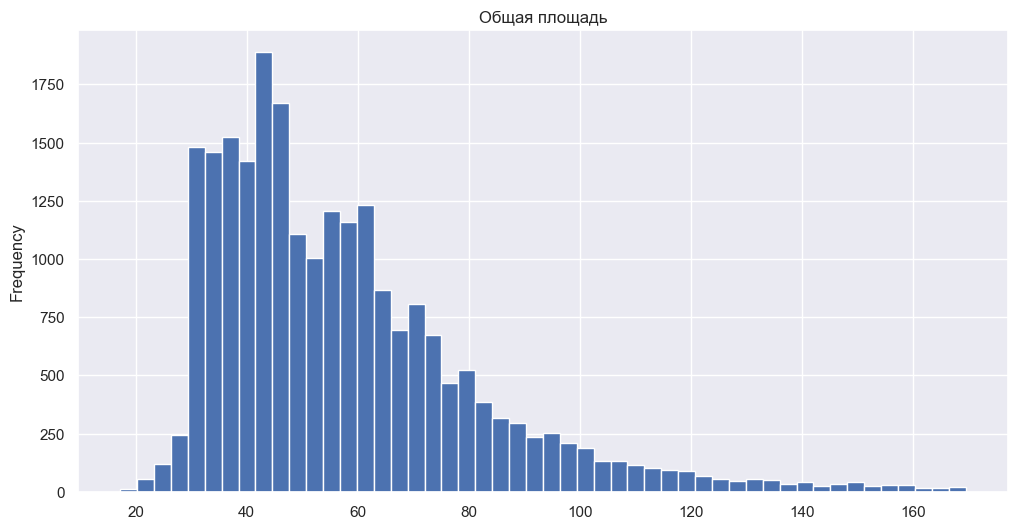

In [115]:
df.total_area.plot.hist(bins=50,figsize=(12, 6), title='Общая площадь');

In [116]:
get_cut_total_area = pd.cut(df.total_area, bins=30).value_counts()

In [117]:
get_cut_total_area.head(5)

(42.583, 47.66]     2895
(37.507, 42.583]    2560
(32.43, 37.507]     2510
(52.737, 57.813]    1957
(57.813, 62.89]     1942
Name: total_area, dtype: int64

По графику видно что данные распределяются по Пуассону, больше всего недвижимости имеют и малую средней площадью.

-------

`living_area`

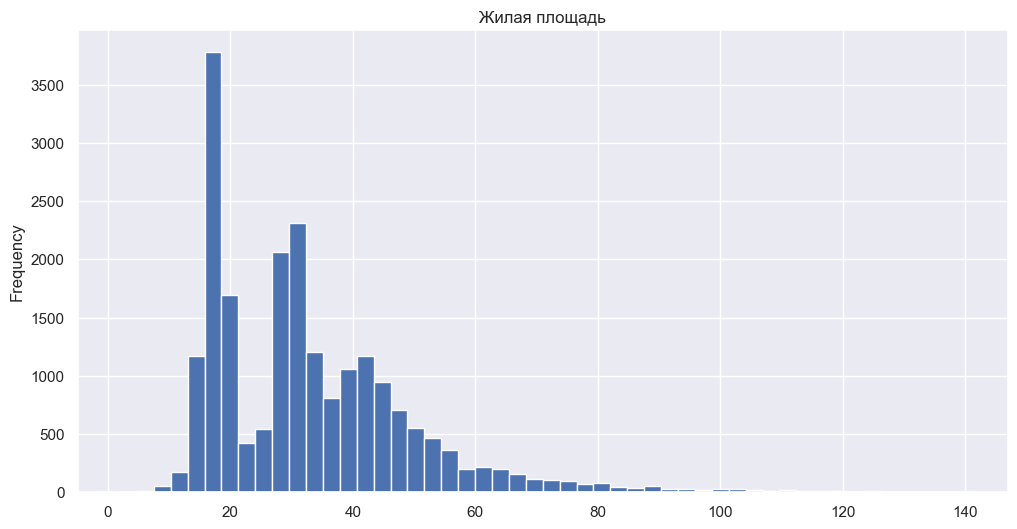

In [118]:
df.living_area.plot.hist(bins=50,figsize=(12, 6), title='Жилая площадь');

In [119]:
get_cut_living_area = pd.cut(df.living_area, bins=50).value_counts()

In [120]:
get_cut_living_area.head(20)

(15.8, 18.56]     3787
(29.6, 32.36]     2314
(26.84, 29.6]     2067
(18.56, 21.32]    1697
(32.36, 35.12]    1201
(40.64, 43.4]     1194
(13.04, 15.8]     1170
(37.88, 40.64]    1060
(43.4, 46.16]      914
(35.12, 37.88]     807
(46.16, 48.92]     706
(48.92, 51.68]     553
(24.08, 26.84]     543
(51.68, 54.44]     465
(21.32, 24.08]     416
(54.44, 57.2]      357
(59.96, 62.72]     212
(57.2, 59.96]      198
(62.72, 65.48]     192
(10.28, 13.04]     171
Name: living_area, dtype: int64

На графике видно распределение Пуассона, также видны большие скопления в районе груп (15.8, 18.56],(26.84, 29.6] и (29.6, 32.36], провалы в (21.32, 24.08]. Такая картина возможно из за большоего количества объектов с маленькой площадью и средней площадью, такая недвижимость хорошо продается и поэтому становятся объектом спекуляции.

-----------

`kitchen_area`

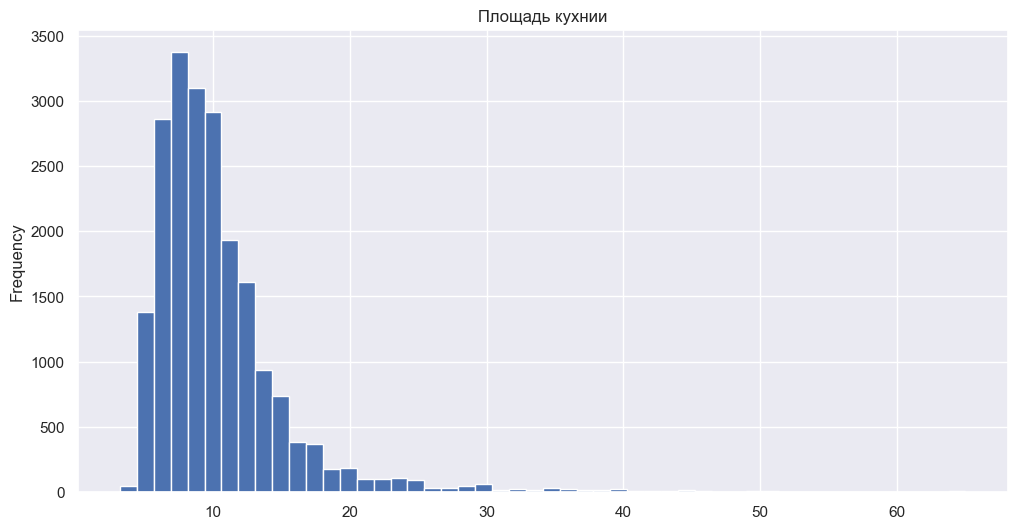

In [121]:
df.kitchen_area.plot.hist(bins=50,figsize=(12, 6), title='Площадь кухнии');

In [122]:
get_cut_kitchen_area = pd.cut(df.kitchen_area, bins=30).value_counts()

In [123]:
get_cut_kitchen_area.head(5)

(5.26, 7.32]     5161
(7.32, 9.38]     4995
(9.38, 11.44]    4501
(11.44, 13.5]    2246
(13.5, 15.56]    1394
Name: kitchen_area, dtype: int64

На графике видно распределение Пуассона которое стремиться к нормальному распределению. Преобладающий размер кухни в от 5 до 13 метров

-----------

`last_price`

In [124]:
df['last_price_dec'] = df.last_price / 1000000

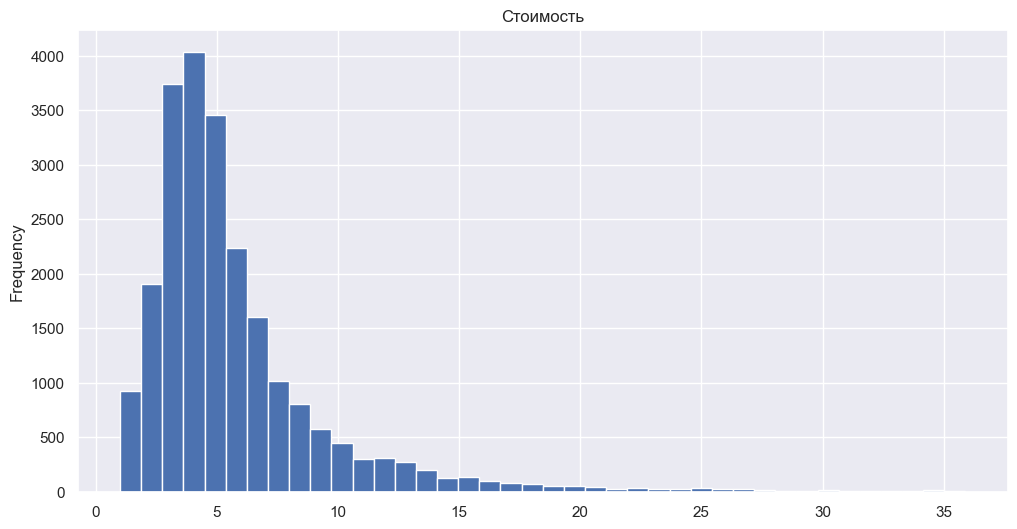

In [125]:
df['last_price_dec'].plot.hist(bins=40,figsize=(12, 6),title='Стоимость');

In [126]:
get_cut_last_price = pd.cut(df['last_price_dec'], bins=100).value_counts()

In [127]:
get_cut_last_price.head(20)

(3.452, 3.801]    1931
(3.801, 4.15]     1627
(4.499, 4.848]    1548
(3.103, 3.452]    1504
(4.15, 4.499]     1394
(2.754, 3.103]    1326
(4.848, 5.197]    1255
(5.197, 5.546]    1174
(2.406, 2.754]     931
(5.895, 6.243]     854
(5.546, 5.895]     850
(2.057, 2.406]     690
(6.243, 6.592]     673
(6.592, 6.941]     618
(1.708, 2.057]     512
(7.29, 7.639]      495
(6.941, 7.29]      485
(1.359, 1.708]     422
(7.988, 8.337]     373
(7.639, 7.988]     345
Name: last_price_dec, dtype: int64

График больше похож распределение Пуассона. Мы видим  минимальную цену, видим как цена резко растет а вместе с ценой и количество позиций которые продаются по такой цене и видим как по мере роста цены количество плавно снижается. Большое количество недвижимости имеет цену от 2.7 до 6 миллионов

-----------

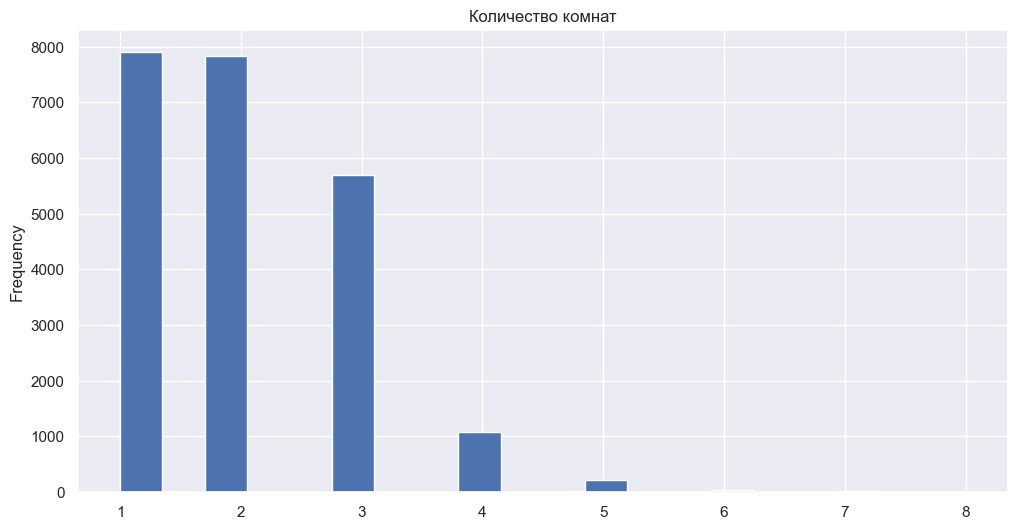

In [128]:
df.rooms.plot.hist(bins=20,figsize=(12, 6),title='Количество комнат');

In [129]:
get_cut_rooms = pd.cut(df.rooms, bins=30).value_counts()

In [130]:
get_cut_rooms.head()

(0.993, 1.233]    7907
(1.933, 2.167]    7823
(2.867, 3.1]      5687
(3.8, 4.033]      1067
(4.967, 5.2]       213
Name: rooms, dtype: int64

На графике видно что большое количество данных находится в группе однокомнатных, двухкомнатных и трехкомнатных квартир 

-----------

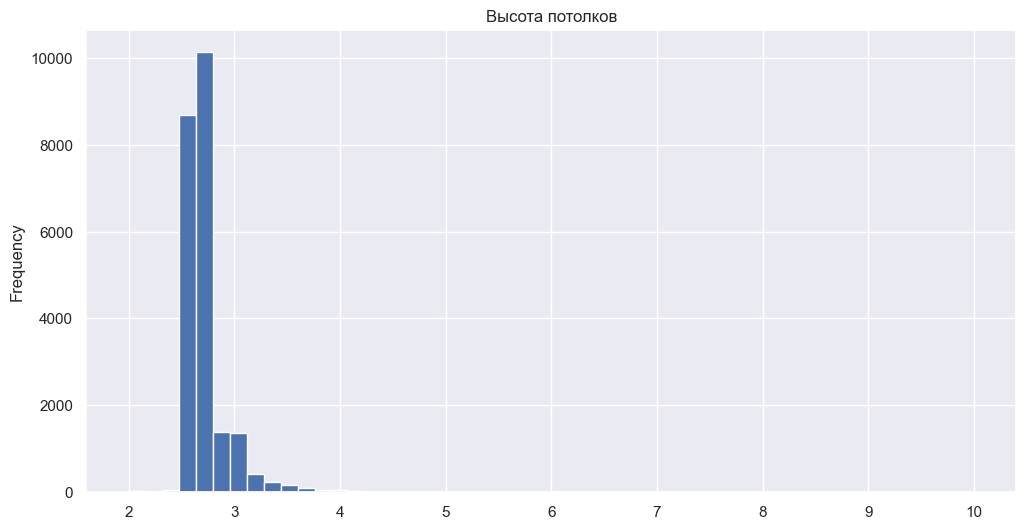

In [131]:
df.ceiling_height.plot.hist(bins=50,figsize=(12, 6),title='Высота потолков');

In [132]:
get_cut_ceiling_height = pd.cut(df.ceiling_height, bins=30).value_counts()

In [133]:
get_cut_ceiling_height.head(5)

(2.533, 2.8]      15544
(2.267, 2.533]     4314
(2.8, 3.067]       1538
(3.067, 3.333]      768
(3.333, 3.6]        293
Name: ceiling_height, dtype: int64

По графику можно сделать вывод что большинство объектов недвижимости имеют высоту потолка от 2.5 до 2.8

-----------

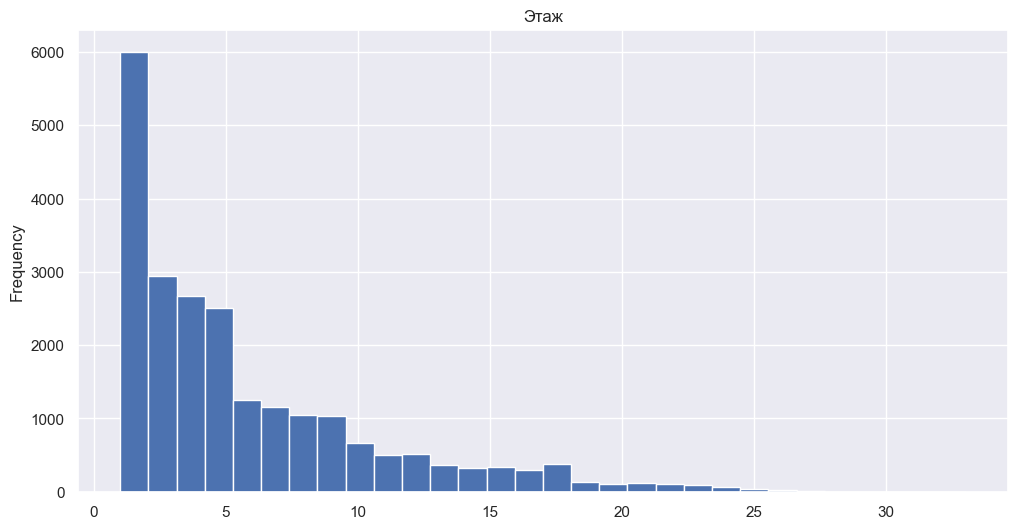

In [134]:
df.floor.plot.hist(bins=30,figsize=(12, 6),title='Этаж');

In [135]:
get_cut_floor = pd.cut(df.floor, bins=30).value_counts()

In [136]:
get_cut_floor.head(10)

(0.968, 2.067]    6001
(2.067, 3.133]    2947
(3.133, 4.2]      2667
(4.2, 5.267]      2506
(5.267, 6.333]    1258
(6.333, 7.4]      1162
(7.4, 8.467]      1054
(8.467, 9.533]    1033
(9.533, 10.6]      666
(15.933, 17.0]     514
Name: floor, dtype: int64

На графике видно что большое количество недвижимости находятся первом, втором, третьем и четвертом этажах.

-----------

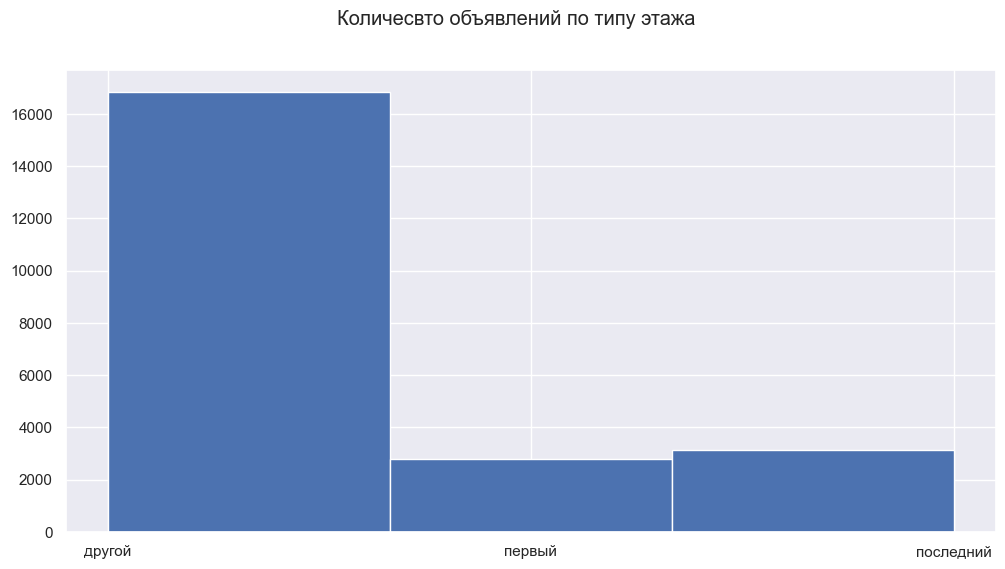

In [137]:
df.type_floor.hist(bins=3,figsize=(12, 6));
plt.suptitle('Количесвто объявлений по типу этажа');

График Показывает что в группе "другой" находится больше данных чем в других.

-----------

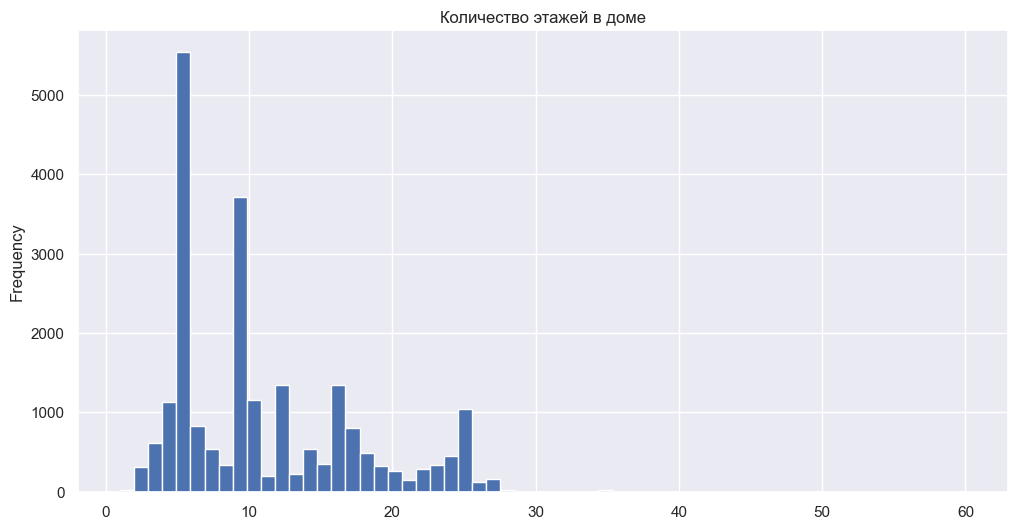

In [138]:
df.floors_total.plot.hist(bins=60,figsize=(12, 6),title='Количество этажей в доме');

In [139]:
get_cut_floors_total = pd.cut(df.floors_total, bins=30).value_counts()

In [140]:
get_cut_floors_total.head(5)

(4.933, 6.9]        6371
(8.867, 10.833]     4868
(2.967, 4.933]      1738
(14.767, 16.733]    1695
(10.833, 12.8]      1534
Name: floors_total, dtype: int64

На графике видно преобладающее количество среди 4-6 этажных построек, а также 8-10 этажные дома. Видно как график несколько раз принимает форму похожую на нормальное распределение.

-----------

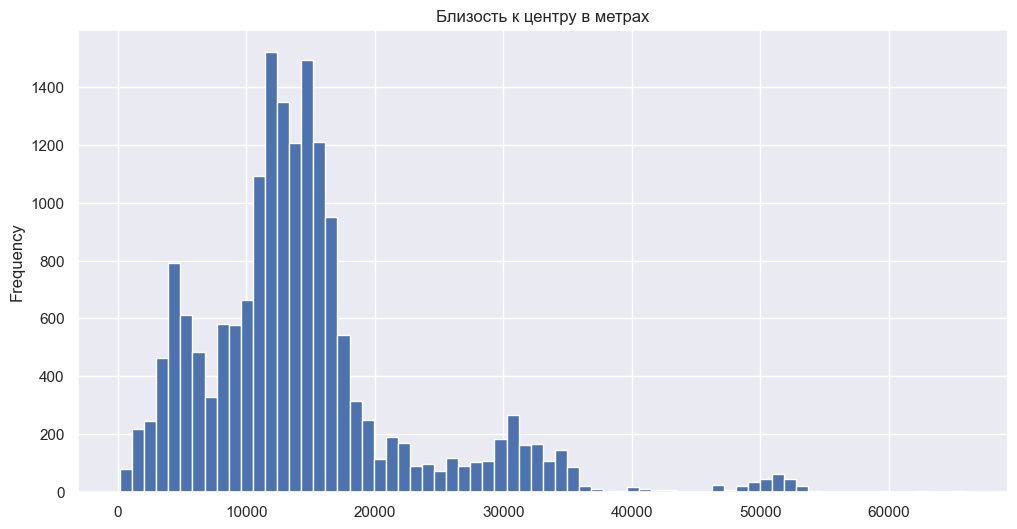

In [141]:
df.cityCenters_nearest.plot.hist(bins=70,figsize=(12, 6),title='Близость к центру в метрах');

In [142]:
get_cut_cityCenters_nearest = pd.cut(df.cityCenters_nearest, bins=30).value_counts()

In [143]:
get_cut_cityCenters_nearest.head(5)

(11145.5, 13338.4]    3237
(13338.4, 15531.3]    3059
(15531.3, 17724.2]    2238
(8952.6, 11145.5]     1796
(4566.8, 6759.7]      1434
Name: cityCenters_nearest, dtype: int64

На графике мы видим большое количество недвижимости в районе пяти километров от центра, а также  в районе пятнадцати километров наблюдается большое количество объектов.

-----------

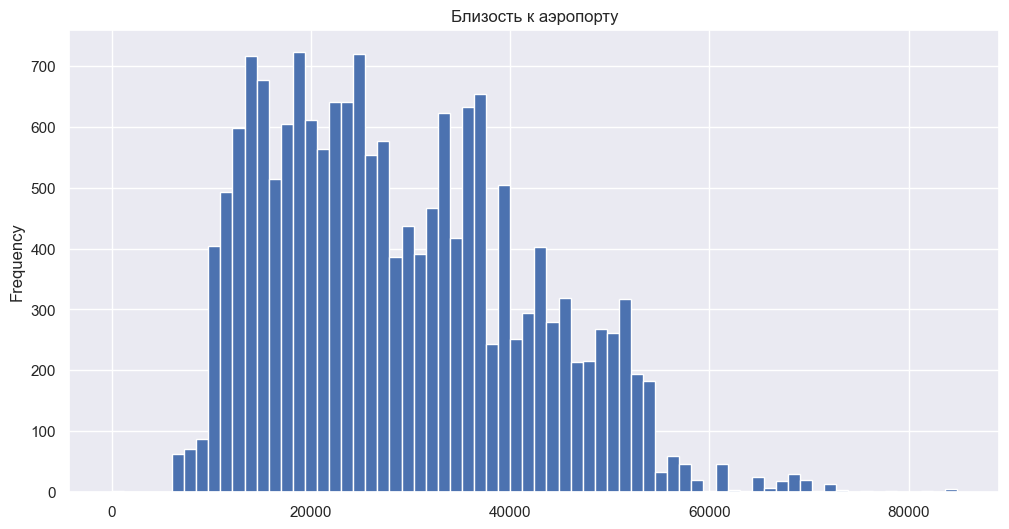

In [144]:
df.airports_nearest.plot.hist(bins=70,figsize=(12, 6),title='Близость к аэропорту');

In [145]:
get_cut_airports_nearest = pd.cut(df.airports_nearest, bins=30).value_counts()

In [146]:
get_cut_airports_nearest.head(5)

(16973.8, 19802.767]      1573
(22631.733, 25460.7]      1537
(11315.867, 14144.833]    1439
(14144.833, 16973.8]      1410
(19802.767, 22631.733]    1396
Name: airports_nearest, dtype: int64

График показывает большое скопление недвижимости в районе 20-30 километров, далее идет спад. Такой плавный спад скорее всего связан с отсутствием картографических данных.

-----------

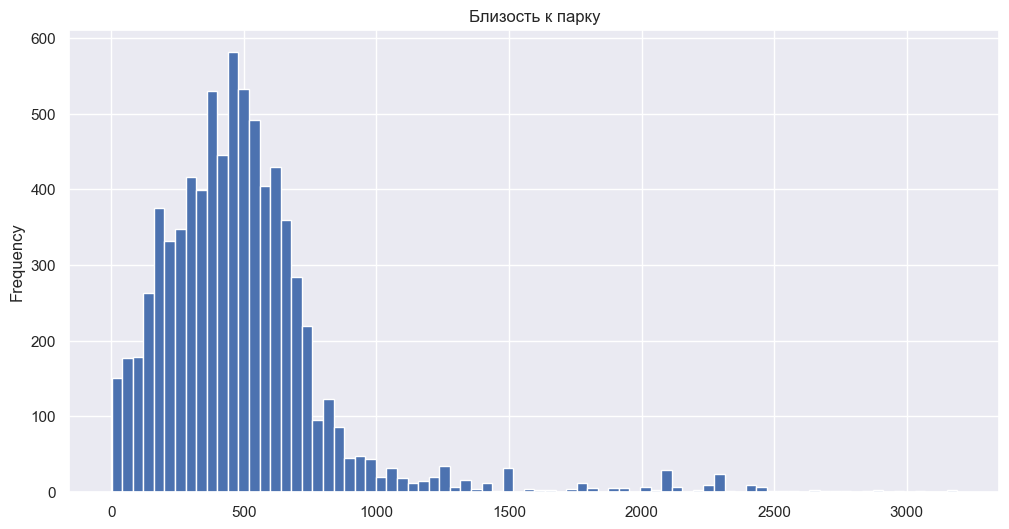

In [147]:
df.parks_nearest.plot.hist(bins=80,figsize=(12, 6),title='Близость к парку');

In [148]:
get_cut_parks_nearest = pd.cut(df.parks_nearest, bins=30).value_counts()

In [149]:
get_cut_parks_nearest.head(5)

(426.2, 532.5]    1422
(319.9, 426.2]    1234
(532.5, 638.8]    1161
(213.6, 319.9]     994
(638.8, 745.1]     818
Name: parks_nearest, dtype: int64

На графике видно что большое количество недвижимости сосредоточено в районе от 200-700 метров, это говорит нам о том что большинство объектов имеет поблизости зону притяжения такую как парк.

-----------

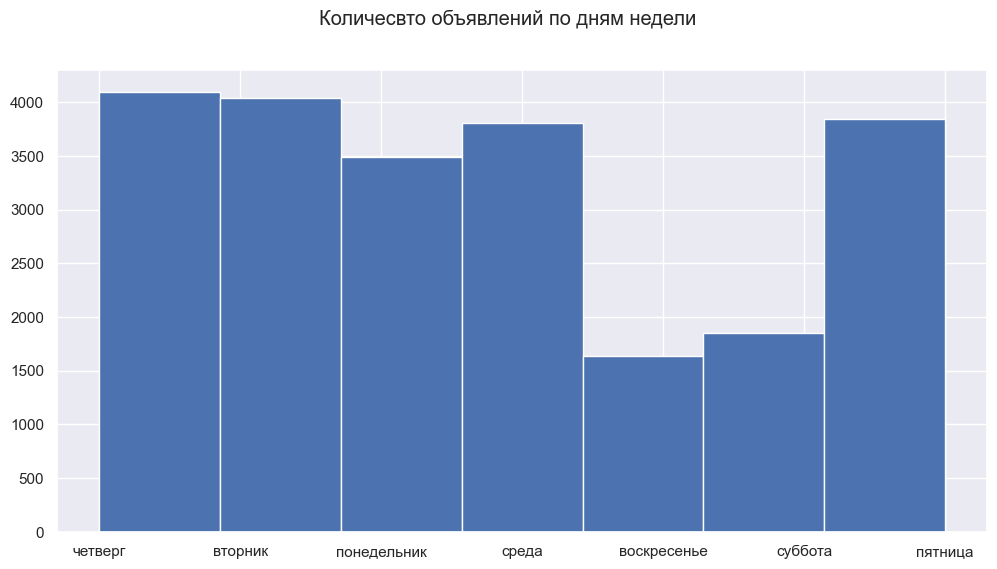

In [150]:
df.weekday.hist(bins=7,figsize=(12, 6));
plt.suptitle('Количесвто объявлений по дням недели');

На графике можно увидеть что четверг является лидирующим днем по количеству опубликованных объявлений,также видно относительно большое количество объявлений в другие будние дни, тогда как в субботу и воскресенья меньше всего публикуют объявления, возможно это связано с работой риэлторов.

-----

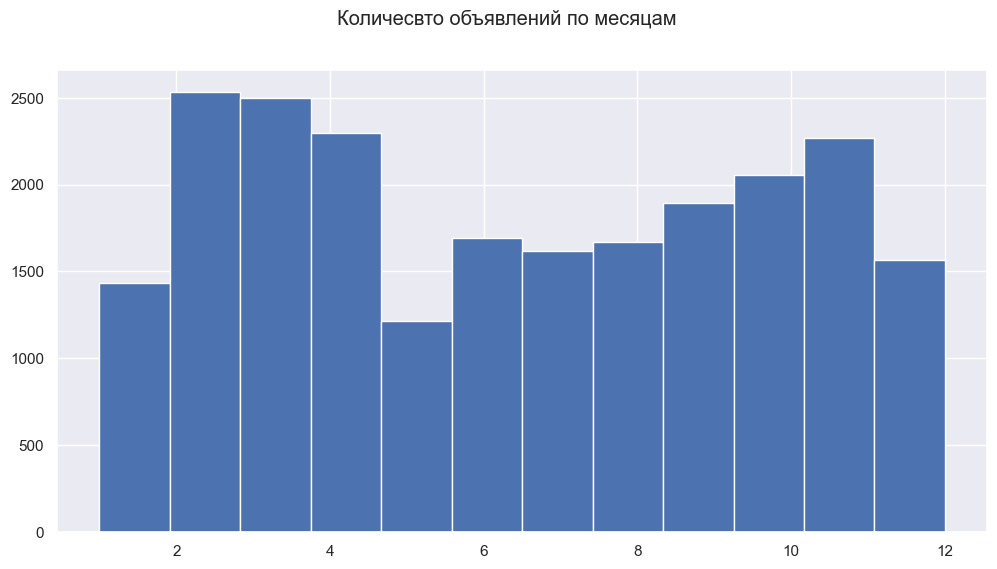

In [151]:
df.month.hist(bins=12,figsize=(12, 6));
plt.suptitle('Количесвто объявлений по месяцам');

На графике видно что лидерами по количеству объявлений является второй, третий, четвертый, одиннадцатый 
месяца. возможно это связано сростом цены на недвижимость в это время года

-----

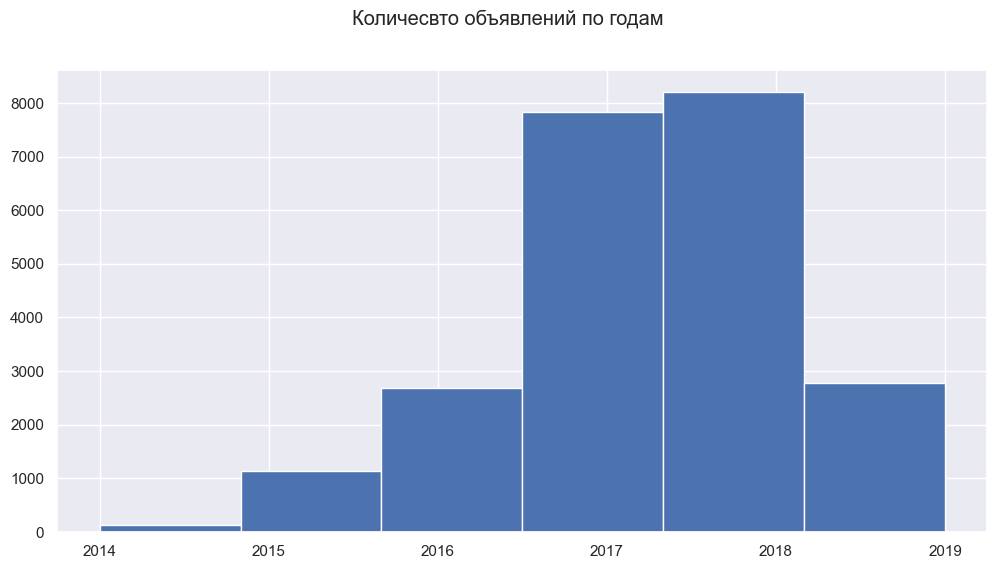

In [152]:
df.year.hist(bins=6,figsize=(12, 6));
plt.suptitle('Количесвто объявлений по годам');

На графике видно явное приимущество в количесвте объявлений в 2017 и 2018 годах

-----------

### Изучите, как быстро продавались квартиры

Построим гистограмму по столбце days_exposition для визуализации сроков продажи и понимания как долго продается недвижимость.

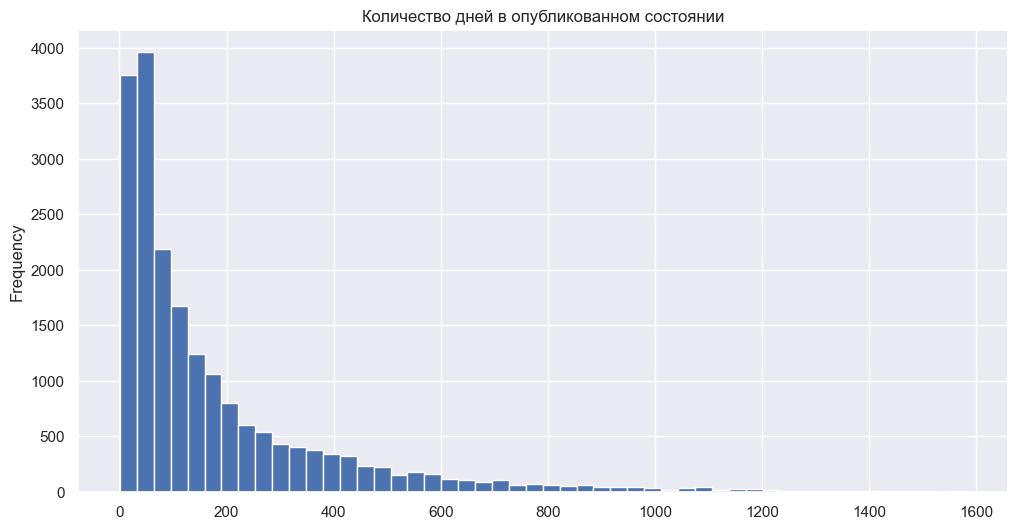

In [153]:
df.days_exposition.plot.hist(bins=50,figsize=(12, 6),title='Количество дней в опубликованном состоянии');

In [154]:
get_days_exp = pd.cut(df.days_exposition, bins=30).value_counts()

In [155]:
get_days_exp.head()

(-0.579, 53.633]      6316
(53.633, 106.267]     4205
(106.267, 158.9]      2297
(158.9, 211.533]      1606
(211.533, 264.167]    1029
Name: days_exposition, dtype: int64

По графику и по списку выше видно что больще половины объектов продаются в срок от 1 до 6 месяцев.

In [156]:
df.days_exposition.describe()

count   19757
mean      180
std       218
min         1
25%        45
50%        95
75%       230
max      1580
Name: days_exposition, dtype: float64

- Медиана столбца days_exposition равна 95 дней.
- Среднее значение 180 дней.

70% недвижимости продается в пределах 6 месяцев, 50% продаются в промежутке от 1.5-до 6 месяцев. 25% продается раньше чем за 1.5 месяца. Можно сказать что те объекты которые продались быстрее чем за 45 дней, продались быстро. Те продажи которые были совершены после истечения 232 дней, можно считать долгими.

Рассмотрим аномально быстрые продажи. Отфильтруем все продажи кроме тех которые совершены в срок от 1 до 30 дней

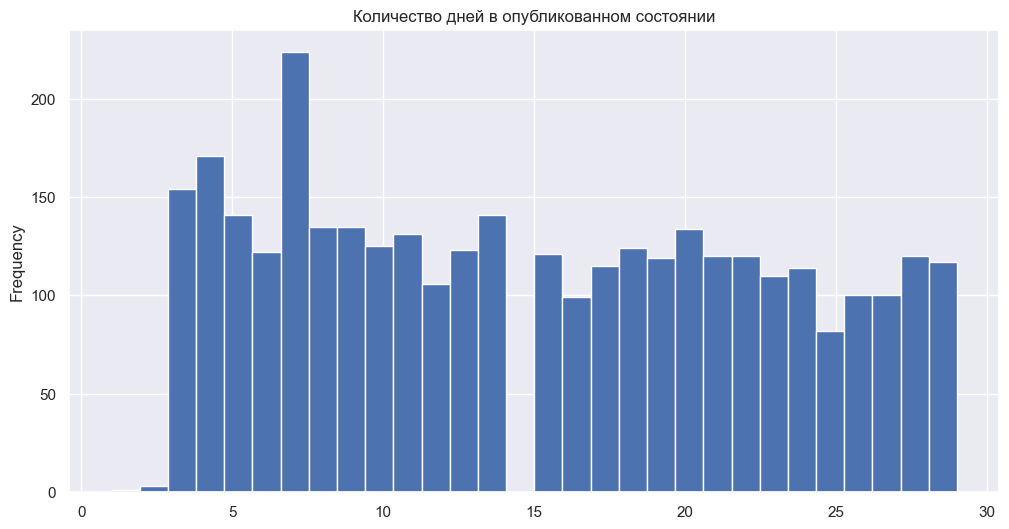

In [157]:
df.query('days_exposition < 30').days_exposition.plot.hist(bins=30, figsize=(12, 6), title='Количество дней в опубликованном состоянии');

In [158]:
pd.cut(df.days_exposition, bins=[1,5,10,50,100,200,2000]).value_counts()

(200, 2000]    5606
(10, 50]       4894
(50, 100]      4087
(100, 200]     3959
(5, 10]         741
(1, 5]          469
Name: days_exposition, dtype: int64

На графике и в списке выше видны аномально быстрые продажи:

- (1, 5] 


Необходимо и days_exposition очистить от выбросом

In [159]:
lop_days_exposition = df.days_exposition.quantile(0.06)

In [160]:
df.query('days_exposition < 10').shape[0]

1086

In [161]:
df = df.query('days_exposition.isna() or days_exposition > @lop_days_exposition')

In [162]:
round(df.shape[0]/ old_df.shape[0],2)

0.91

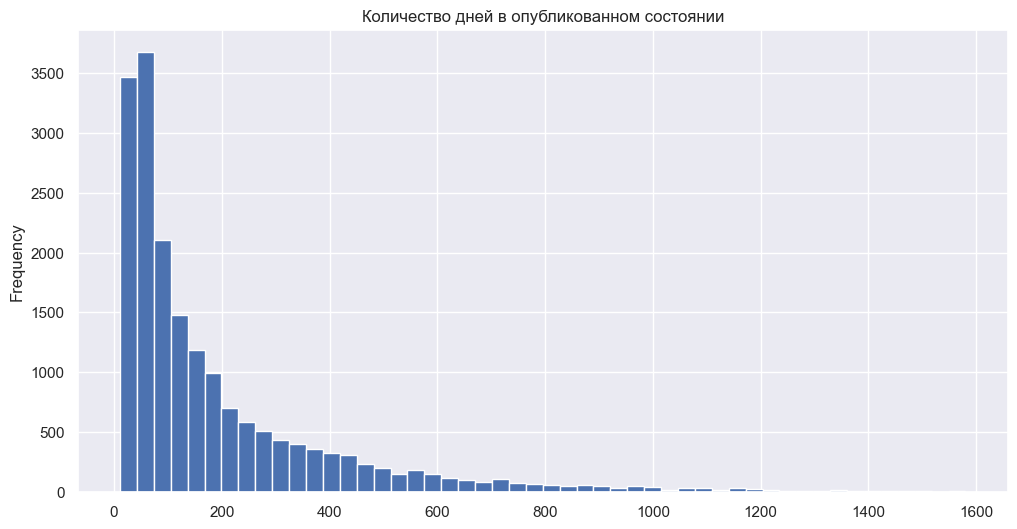

In [163]:
df.days_exposition.plot.hist(bins=50,figsize=(12, 6),title='Количество дней в опубликованном состоянии');

Также можно рассмотреть пики. Отфильтруем  все продажи которые совершались в срок от 14 до 235 дней

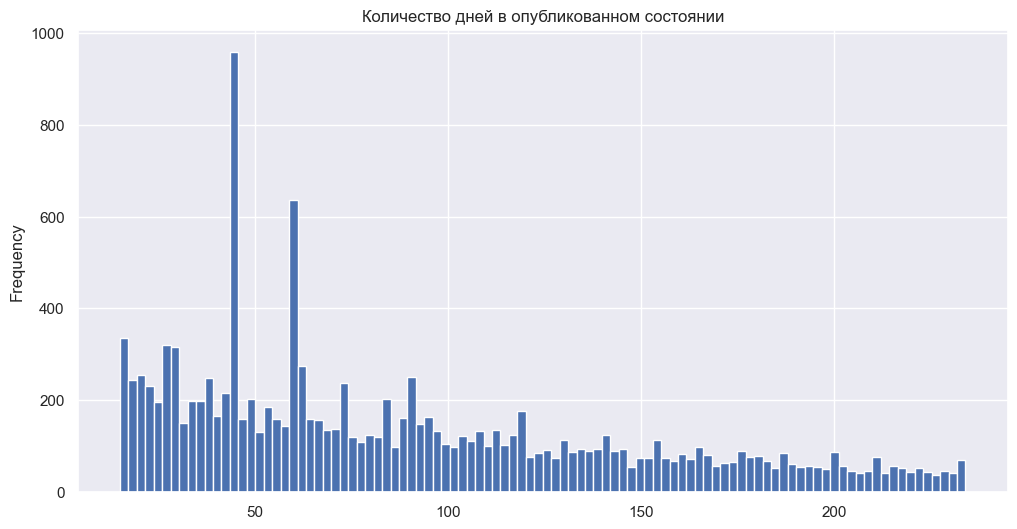

In [164]:
df.query('14 < days_exposition < 235').days_exposition.plot.hist(bins = 100, figsize=(12, 6), title='Количество дней в опубликованном состоянии');

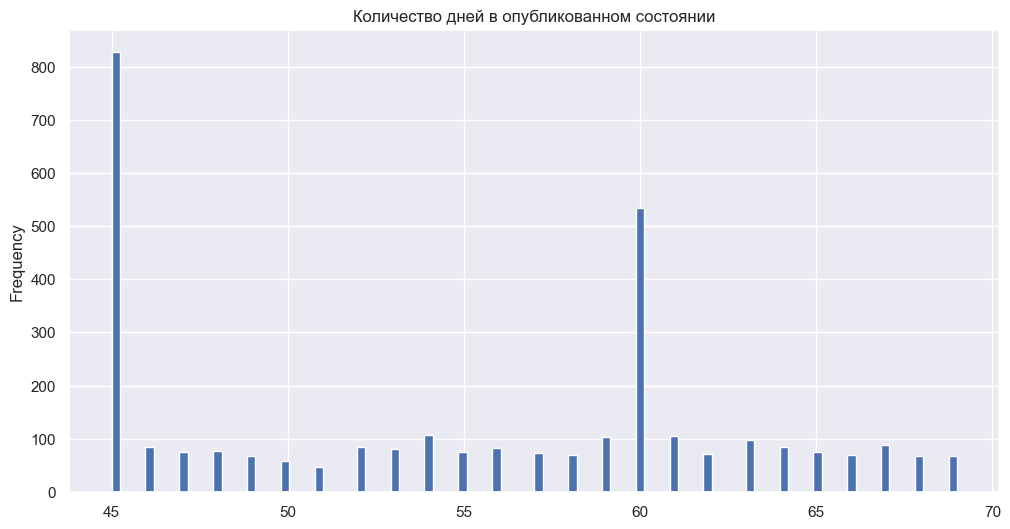

In [165]:
df.query('45 < days_exposition < 70').days_exposition.plot.hist(bins = 100, figsize=(12, 6), title='Количество дней в опубликованном состоянии');

In [166]:
tf = df.query('45 <= days_exposition <= 47')

In [167]:
df.query('45 <= days_exposition <= 47').shape[0]

912

In [168]:
tf.shape[0]

912

In [169]:
tf.groupby(['year','month'])[['year','month']].count().head(50)

year  month
year month             
2016 5        36     36
     6        25     25
     7         2      2
     9         1      1
     12        1      1
2017 1        11     11
     2        14     14
     3         1      1
     4        18     18
     5        27     27
     6        25     25
     7        22     22
     8        17     17
     9        34     34
     10       27     27
     11       35     35
     12       80     80
2018 1        66     66
     2       103    103
     3        58     58
     4        17     17
     6        32     32
     7        46     46
     8        48     48
     9        40     40
     10       39     39
     11       20     20
     12       11     11
2019 1        14     14
     2        19     19
     3        23     23

### Факторы больше всего влияющие на полную стоимость объекта

In [170]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor,distance_from_center_km,last_price_dec
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой,16,13
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый,19,3
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой,14,5
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой,8,10
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой,NaN,3


Проверим как влияет общая площадь на полную стоимость обекта. Для этого построим сводную таблицу 

In [171]:
df.groupby('total_area')['last_price'].agg(['count','mean'])

,count,mean
total_area,,
18,1,3400000
18,1,1737000
18,2,1695000
18,1,1500000
19,1,1900000
...,...,...
168,1,23900000
169,2,14425000
169,1,27250000


Такой вид таблицы не очень удобен, пожтому было принято решение категоризировать данные столбца total_area.

In [172]:
df['cats_total_area'] = pd.cut(df.total_area, bins = [0,20,100,300,1000], labels=('малый размер','средний размер','большие','очень большие'))

Строим сводную и сохраняем ее.

In [173]:
table_for_total_area =  df.groupby('cats_total_area')['last_price'].agg(['count','mean'])

Переименовали столбцы.

In [174]:
table_for_total_area.columns = ['flat_count','mean_cost']

Строим график для того что бы визуализировать зависисмость.

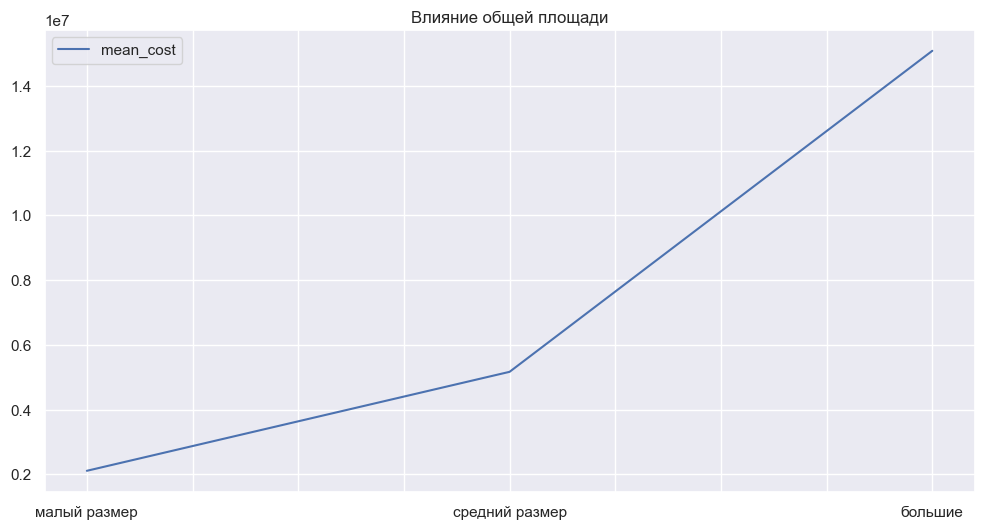

In [175]:
table_for_total_area.mean_cost.plot(legend=True,figsize=(12, 6), title='Влияние общей площади', xlabel='');

In [176]:
table_for_total_area

,flat_count,mean_cost
cats_total_area,,
малый размер,11,2105636
средний размер,20197,5164782
большие,1333,15086943
очень большие,0,NaN


Выводик коэфицент зависимости

In [177]:
round(df.total_area.corr(df.last_price),2)

0.77

Вывод: На графике и в сводной таблице можно увидть сильную зависимость размера недвижимости и ее стоимость. Следует, что чем больше общая площадь тем выше стоимость недвижимости.

Создадим функцию для построения сводной для следующих показателей

In [178]:
def get_cats_all_col(name_new_col, cated_col, target_col, rang_e, label_s):
    
    
    
    df[name_new_col] = (
                        pd.cut(
                    
                        df[cated_col], 
                        
                        bins = rang_e,
                    
                        labels=(label_s))
                        )
    
    
    table_for_pivot =  df.groupby(name_new_col)[target_col].agg(['count','mean'])
    
    return table_for_pivot

---------

**Изучим как влияет пказатель living_area на стоимость**

In [179]:
pivot_for_living_area = get_cats_all_col(
                                            'cats_living_area',
                                            
                                            'living_area',
    
                                            'last_price',
    
                                            [0,20,50,300,1000],
    
                                            ['малый размер','средний размер','большие','очень большие'])

In [180]:
pivot_for_living_area.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Влияние размера жилой площади'}>

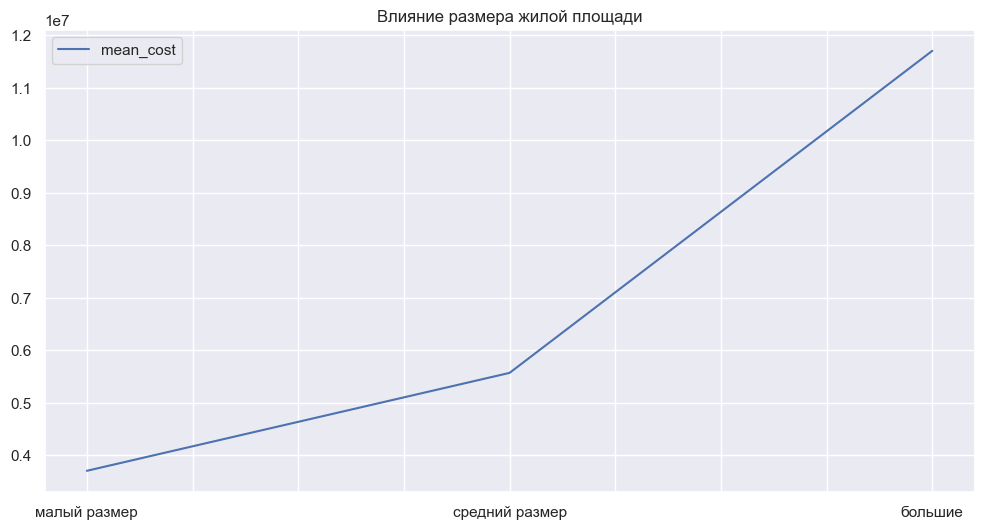

In [181]:
pivot_for_living_area.mean_cost.plot(legend=True, figsize=(12, 6),title='Влияние размера жилой площади',xlabel='') 

In [182]:
pivot_for_living_area

,flat_count,mean_cost
cats_living_area,,
малый размер,6029,3702025
средний размер,11341,5568378
большие,2464,11706925
очень большие,0,NaN


In [183]:
round(df.living_area.corr(df.last_price),2)

0.65

Вывод: На графике и в сводной таблице можно увидть сильную зависимость стоимости от жилой площади. Следует, что чем больше жилая площадь тем выше стоимость недвижимости.

--------

**Изучим как на стоимость влияет показатель `kitchen_area`**

In [184]:
pivot_for_kitchen_area = get_cats_all_col(
                                            'cats_kitchen_area',
                                            
                                            'kitchen_area',
    
                                            'last_price',
    
                                            [0,10,50,300,1000],
    
                                            ['малый размер','средний размер','большие','очень большие'])

In [185]:
pivot_for_kitchen_area.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Влияние размера кухни'}>

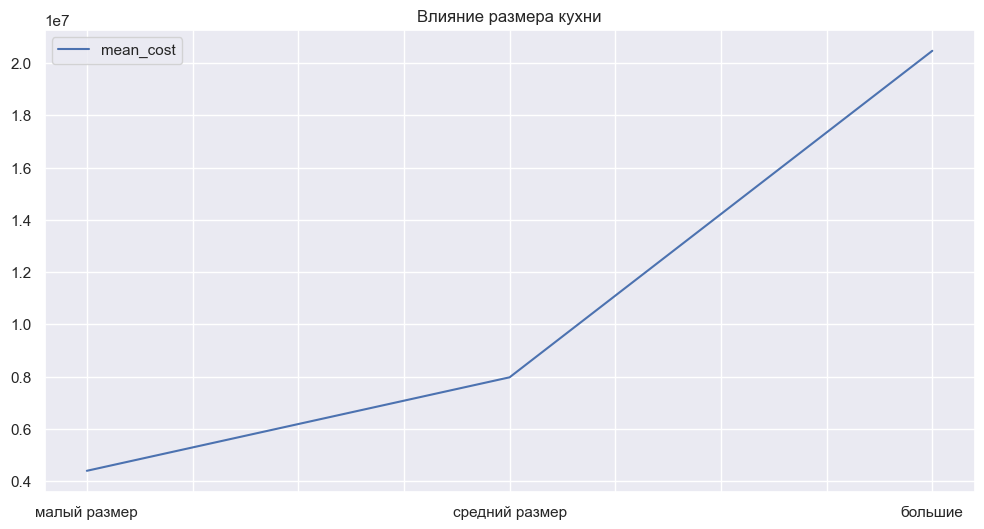

In [186]:
pivot_for_kitchen_area.mean_cost.plot(legend=True,figsize=(12, 6),title='Влияние размера кухни',xlabel='') 

In [187]:
pivot_for_kitchen_area

,flat_count,mean_cost
cats_kitchen_area,,
малый размер,11970,4397157
средний размер,7660,7975580
большие,13,20474615
очень большие,0,NaN


In [188]:
round(df.kitchen_area.corr(df.last_price),2)

0.59

На графике видно что размер кухни также сильно влияет на стоимость недвижимости чем больше кухня тем выше стоимость.

--------------

**Рассмотрим как на стоимость влияет показатель количества комнат `rooms`**

In [189]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor,distance_from_center_km,last_price_dec,cats_total_area,cats_living_area,cats_kitchen_area
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой,16,13,большие,большие,средний размер
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый,19,3,средний размер,малый размер,средний размер
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой,14,5,средний размер,средний размер,малый размер
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой,8,10,средний размер,средний размер,средний размер
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой,NaN,3,средний размер,малый размер,малый размер


In [190]:
pivot_for_rooms = get_cats_all_col(
                                            'cats_rooms',
                                            
                                            'rooms',
    
                                            'last_price',
    
                                            [1,3,5,10],
    
                                            ['1-2 комнаты','3-4 комнаты','5-10 комнат'])

In [191]:
pivot_for_rooms.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Влияние количетва комнат'}>

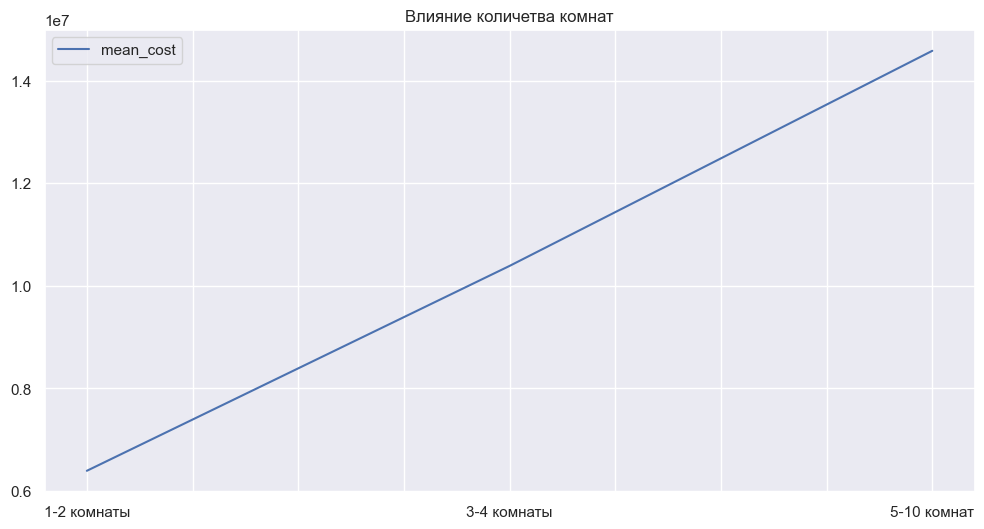

In [192]:
pivot_for_rooms.mean_cost.plot(legend=True, figsize=(12, 6),title='Влияние количетва комнат',xlabel='') 

In [193]:
pivot_for_rooms

,flat_count,mean_cost
cats_rooms,,
1-2 комнаты,12860,6394257
3-4 комнаты,1246,10391499
5-10 комнат,55,14588127


In [194]:
round(df.rooms.corr(df.last_price),2)

0.47

На графике видно что чем больше количество комнат имеет недвижимость тем выше цена, хотя коэффициент корреляции ниже чем  остальных случаях рассмотренных выше. Скорее всего это связано тем что разброс в количестве ниже.

----------

**Рассмотрим как влияеь показатель `type_floor`**

In [195]:
table_for_type_floor =  df.groupby('type_floor')['last_price'].agg(['count','mean'])

In [196]:
table_for_type_floor.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Зависимость цены от этажа'}>

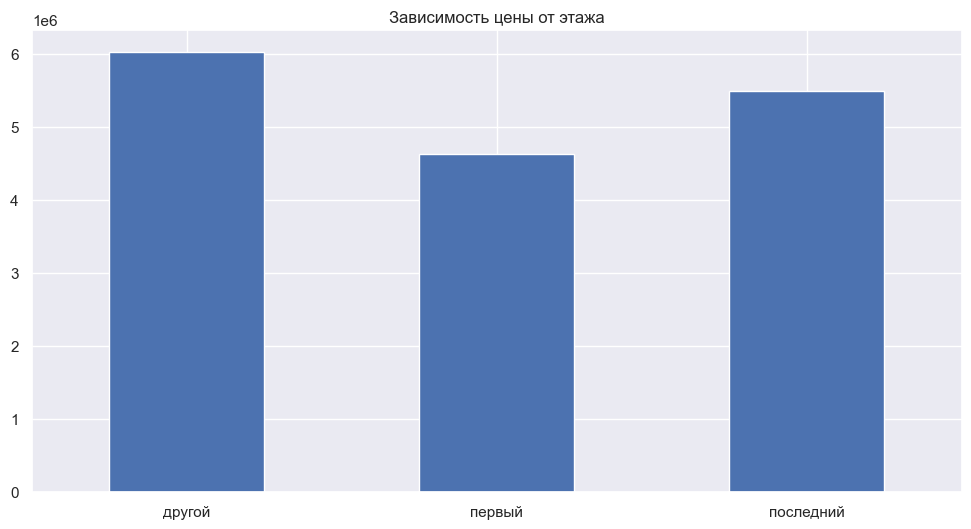

In [197]:
table_for_type_floor.mean_cost.plot(kind='bar', figsize=(12, 6),title='Зависимость цены от этажа', rot=0, xlabel='') 

In [198]:
table_for_type_floor

,flat_count,mean_cost
type_floor,,
другой,15892,6027215
первый,2684,4621174
последний,2965,5483782


На графике видно что самая низкая по стоимости недвижимость которая находится на первом этаже. Последний этаж стоит дороже. 

---------

 Рассмотрим влияние показателя `year`

In [199]:
table_for_year =  df.groupby('year')['last_price'].agg(['count','mean']) 

In [200]:
table_for_year.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Зависимость цены от года продажи'}>

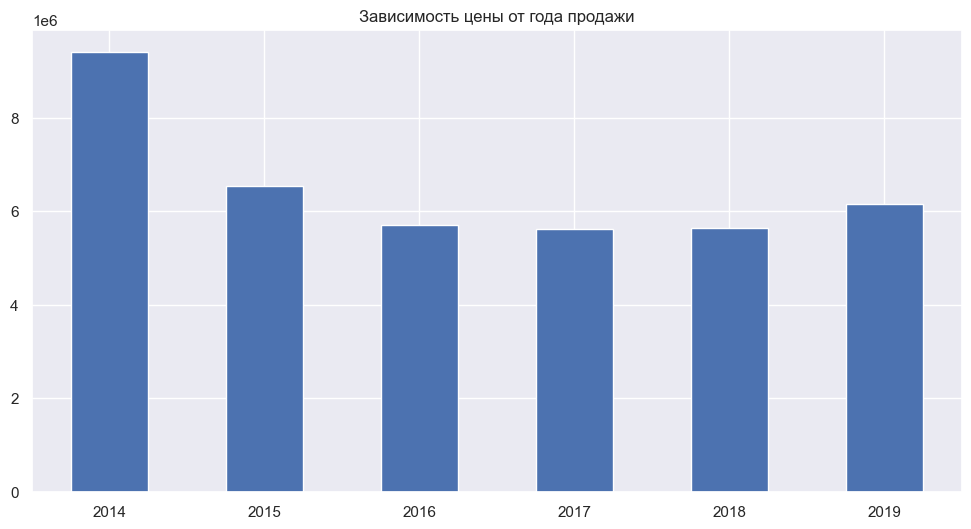

In [201]:
table_for_year.mean_cost.plot(kind='bar', figsize=(12, 6),title='Зависимость цены от года продажи', rot=0, xlabel='') 

In [202]:
table_for_year

,flat_count,mean_cost
year,,
2014,127,9415282
2015,1126,6537797
2016,2660,5718155
2017,7451,5633724
2018,7644,5636003
2019,2533,6167023


По годам видно что самая высокая цена была в 2014 году, далее произошол спад который достиг своего предела в 2018 году, а после цена пошла вверх.

----------

`month`

In [203]:
table_for_month =  df.groupby('month')['last_price'].agg(['count','mean']) 

In [204]:
table_for_month.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Зависимость цены от месяца'}>

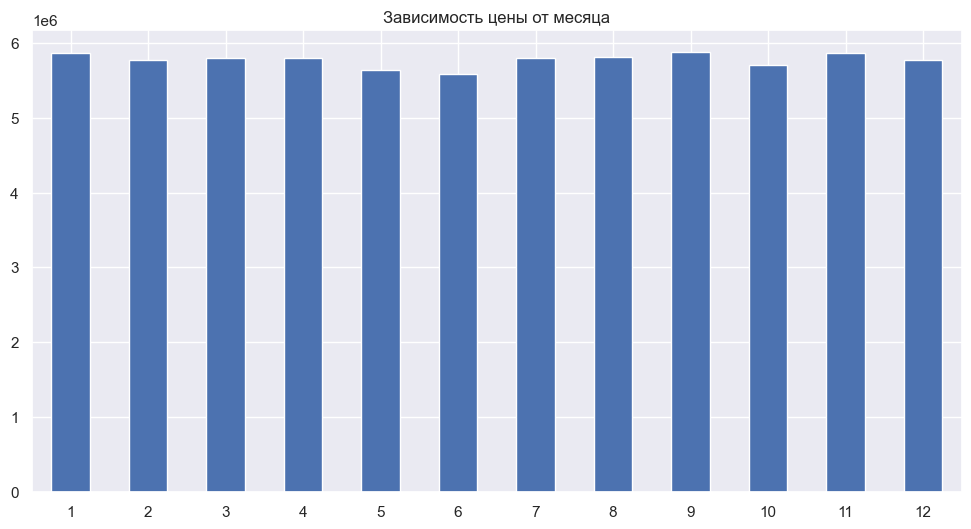

In [205]:
table_for_month.mean_cost.plot(kind='bar', figsize=(12, 6),title='Зависимость цены от месяца', rot=0, xlabel='') 

In [206]:
table_for_month

,flat_count,mean_cost
month,,
1,1363,5863571
2,2438,5775936
3,2355,5791956
4,2170,5797186
5,1186,5636498
6,1632,5580979
7,1533,5804328
8,1584,5804855
9,1750,5880955


In [207]:
round(df.month.corr(df.last_price),2)

0.0

Хоть и показатель корреляции отражает нулевую связь с ценой, по графику видно что характер падения и роста цены от месяца к месяцу имеет изменчивую тенденцию. На всем протяжении года видно как от начала цена падает примерно 2 месяца затем растет также около 2 месяцем затем снова падает.

-----

`weekday`

In [208]:
table_for_weekday =  df.groupby('weekday')['last_price'].agg(['count','mean']) 

In [209]:
table_for_weekday.columns = ['flat_count','mean_cost']

<AxesSubplot:title={'center':'Зависимость цены от дня недели'}>

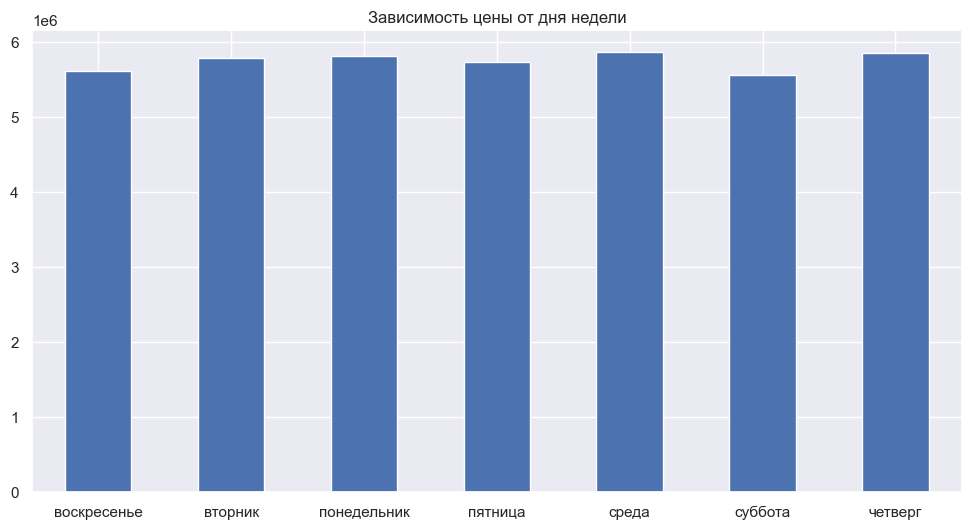

In [210]:
table_for_weekday.mean_cost.plot(kind='bar', figsize=(12, 6),title='Зависимость цены от дня недели', rot=0, xlabel='')

In [211]:
table_for_weekday

,flat_count,mean_cost
weekday,,
воскресенье,1522,5607871
вторник,3813,5788312
понедельник,3310,5816543
пятница,3648,5733018
среда,3615,5866366
суббота,1755,5561182
четверг,3878,5855478


По графику видно что зависимость цены от дня недели отсутствует, несмотря на небольшие изменения график стремится к равновесию.

--------

### Посчитайте среднюю цену одного квадратного метра

In [212]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor,distance_from_center_km,last_price_dec,cats_total_area,cats_living_area,cats_kitchen_area,cats_rooms
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой,16,13,большие,большие,средний размер,1-2 комнаты
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый,19,3,средний размер,малый размер,средний размер,NaN
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой,14,5,средний размер,средний размер,малый размер,1-2 комнаты
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой,8,10,средний размер,средний размер,средний размер,1-2 комнаты
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой,NaN,3,средний размер,малый размер,малый размер,NaN


Создаем сводную таблицу по названию населенного пункта и считаем количесто и среднюю цену.

In [213]:
mean_price = df.pivot_table(index='locality_name', values='price_sqrm', aggfunc=['count','mean'])

Переименовали столбцы

In [214]:
mean_price.columns = ['count','mean']

In [215]:
mean_price.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,14267,111223
мурино,525,85624
кудрово,425,95146
шушары,416,78523
всеволожск,377,68876
пушкин,341,102764
колпино,315,75148
парголово,300,90120
гатчина,289,68733


Из таблице выше видно что самая высокая стоимость одного квадратного метра недвижимости в Санкт-Петербурге.
Самая низкая стоимость в Выборге.

### Средняя цена каждого километра

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [216]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_status,price_sqrm,weekday,month,year,type_floor,distance_from_center_km,last_price_dec,cats_total_area,cats_living_area,cats_kitchen_area,cats_rooms
0,20,13000000,108,2019-03-07,3,3,16,51,8,NaN,False,False,25,0,санкт-петербург,18863,16028,1,482,2,755,NaN,город,120370,четверг,3,2019,другой,16,13,большие,большие,средний размер,1-2 комнаты
1,7,3350000,40,2018-12-04,1,3,11,19,1,NaN,False,False,11,2,шушары,12817,18603,0,NaN,0,NaN,81,поселок,82921,вторник,12,2018,первый,19,3,средний размер,малый размер,средний размер,NaN
2,10,5196000,56,2015-08-20,2,3,5,34,4,NaN,False,False,8,0,санкт-петербург,21741,13933,1,90,2,574,558,город,92786,четверг,8,2015,другой,14,5,средний размер,средний размер,малый размер,1-2 комнаты
3,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,False,False,41,0,санкт-петербург,31856,8098,2,112,1,48,121,город,100000,вторник,6,2018,другой,8,10,средний размер,средний размер,средний размер,1-2 комнаты
4,10,2890000,30,2018-09-10,1,3,12,14,5,NaN,False,False,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,поселок,95066,понедельник,9,2018,другой,NaN,3,средний размер,малый размер,малый размер,NaN


Делаем срез данных

In [217]:
distance = df.query('locality_name == "санкт-петербург" and ~distance_from_center_km.isna() and distance_from_center_km != 0')

На основе среза формируем сводную

In [218]:
mean_cost = distance.groupby('distance_from_center_km').price_sqrm.agg(['mean'])

Переименовывем столбец

In [219]:
mean_cost.columns = ['mean_cost_of_sqrm']

<AxesSubplot:title={'center':'Средняя стоимость каждого километра'}>

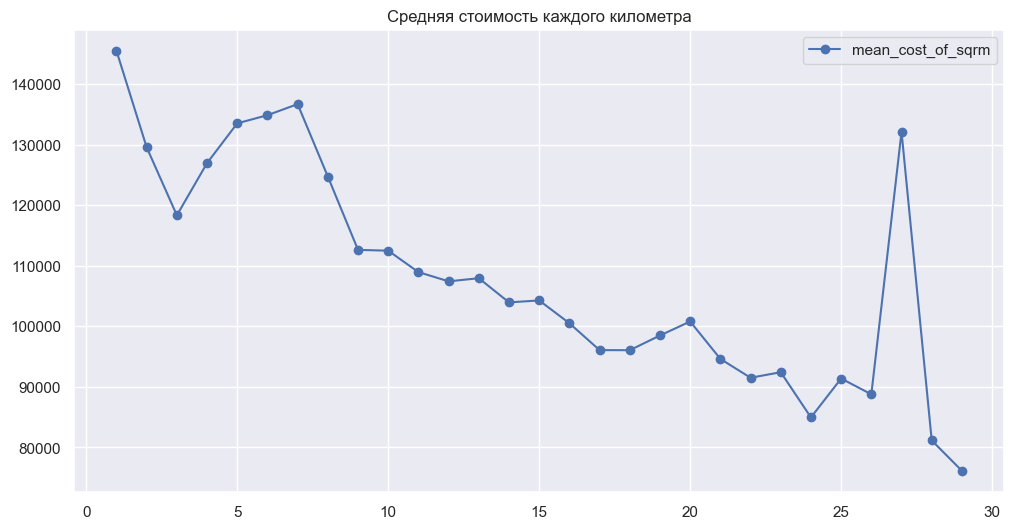

In [220]:
mean_cost.plot(style='o-', figsize=(12, 6), title='Средняя стоимость каждого километра', xlabel='')

На графике видно как цена меняется в зависимсто от дальности или близости к центру. Если недвижимость расположена близко к центру то цена растет  если дальше то цена становится ниже. Таке видны отельные части графика где рост резко повышается или понижается при этом нарушая общее положение, это происходит под влиянием других факторов. 

In [221]:
mean_cost

,mean_cost_of_sqrm
distance_from_center_km,
1,145496
2,129561
3,118334
4,126957
5,133524
6,134865
7,136691
8,124731
9,112626


Создадим функцию для подсчета средней разницы цены в зависимости от того как далеко находится недвижимость от центра.

In [222]:
def get_diff_cost(raw):
    
    unpacked = [i[0] for i in raw]
    
    diff_btw_km = []
    
    for i in range(len(unpacked)):
   
        if i == len(unpacked)-1:
            
            diff_btw_km.append(0)
        
        else:
            s = abs(round(unpacked[i] - unpacked[i+1]))
            
            diff_btw_km.append(s)
            
    return diff_btw_km

Ниже указано значение стоимости, выражающее среднюю цену которую, придется доплатить или вычесть из стоимости одного квадратного метра недвижимости за каждый километр. 

In [223]:
round(np.mean(get_diff_cost(mean_cost.values)))

7536

## Вывод

В ходе предобработки данных был выявлен ряд столбцов с пропусками. Пропуски могли возникнуть из-за, человеческого фактора, сбоя, либо умышленное незаполнение данных, неправильная выгрузка данных. Также было выявлено, что в сете отсутствует ряд картографических данных по близлежащим от Санкт-петербурга населенным пунктам. Это может быть связано с некорректной работой картографической системой либо с неправильной выгрузкой данных, что требует проверки.

В ходе исследовательского анализа был выявлен ряд особенностей, в том числе то, что большинство объектов недвижимости, имеют малую и среднюю общую площадь. Жилая площадь составляет от 15 до 40 метров. Был определен преобладающий размер кухни в от 5 до 13 метров. Большое количество недвижимости имеет цену от 27 до 6 миллионов. Также большинство объектов имеет 1-3 комнаты с высотой потолков 2, 5-2, 8 метров. Подавляющее большинство расположено на 1-5 этажах, в 4-6 этажных домах, а также 8-10.

Большое количество недвижимости в районе пяти километров от центра, а также в районе пятнадцати километров наблюдается большое количество объектов, с аэропортом в 20-30 колометрах. У многих объектов есть поблизости парк в районе километра.

Мы выяснили, что по будням публикуется больше объектов. Предполагается, что это связано с работой риэлторов. Лидирующие месяца по количеству объявлений являются февраль, март, апрель. Далее идет спад, но затем плавный рост до ноября.

Самое больше количество объектов, выставленных на продажу, наблюдается в 2017 и 2018 году. Предполагается, что это связано с падением цены на недвижимость и активизации продаж по переуступки. Выявлено, что в датасете больше половины объектов примерно 70 процентов, продаются в период от 1 до 6 месяцев. Срок продажи 45-50 дней можно считать быстрой продажей. Все, что продавалось больше 230 дней, можно считать долгой продажей.

Было выявлено, что на полную стоимость влияют очень сильно несколько показателей. Это общая площадь, жилая площадь, площадь кухни. Чем больше площадь, тем выше цена. Также на стоимость влияют количество комнат, больше-дороже, тип этажа, самый низкий по стоимости - первый этаж. Были выявлены самые высокие цены на недвижимость в 2014 году. Далее до 2017 происходил спад, и график снова устремился вверх в 2018 году. В рамках года было отмечено колебание цены: 2 месяца спад, затем рост 1-2 месяца, затем снова спад.

Самая высокая цена за квадратный метр была установлена в Санкт-петербурге, а самая низкая - в Выборге. Средняя цена одного квадратного метра растет по мере приближения к центру. За каждый километр в среднем придется добавить к стоимости в районе 7500.

------------